<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/Pulsar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PULSAR DATASET**
26/11/2022 ----- Dataset: [Link](https://www.kaggle.com/competitions/playground-series-s3e10/data)

### **About Dataset**

This Kaggle notebook is aimed at providing a comprehensive exploratory data analysis (EDA) for the given dataset, with the ultimate goal of making informed decisions and recommendations before diving into modeling.
>Through this EDA, we will gain a deeper understanding of the data structure, missing values, relationships between variables, and any patterns or anomalies that could impact our modeling process. By performing a thorough EDA, we can identify potential roadblocks and make necessary pre-processing decisions that will improve the performance and accuracy of our models. So, buckle up, and let's embark on this journey of discovering insights and valuable information from the data to drive better modeling decisions.


**The dataset** for this competition (both train and test) was generated from a deep learning model trained on the [Pulsar Classification For Class Prediction](https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction). The goal is to predict `0` or `1` (is pulsar or not).

>[A pulsar (from pulsating radio source)](https://en.wikipedia.org/wiki/Pulsar) is a highly magnetized rotating neutron star that emits beams of electromagnetic radiation out of its magnetic poles.


There are 9 independent variables (including `id`):

* `Mean_Integrated`: Mean of Observations.
* `SD`: Standard deviation of Observations.
* `EK`: Excess kurtosis of Observations.
* `Skewness`: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.
* `Mean_DMSNR_Curve`: Mean of DM SNR CURVE of Observations.
* `SD_DMSNR_Curve`: Standard deviation of DM SNR CURVE of Observations.
* `EK_DMSNR_Curve`: Excess kurtosis of DM SNR CURVE of Observations.
* `Skewness_DMSNR_Curve`: Skewness of DM SNR CURVE of Observations

Target varibale:
* `Class`:  `0` is not pulsar, `1` is pulsar.

**Metrics**:
* [LogLoss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)

**DM SNR CURVE**:
>Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.

## **2.0 Packages**

In [ ]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
!pip install catboost
#!pip install haversine
#!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna

In [ ]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
from scipy import stats
from random import randint
import random
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
from itertools import combinations

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import missingno as msno
import imblearn

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping)
import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

from lightgbm import early_stopping

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa

# Import libraries for Hypertuning
import optuna

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 13.752898931503296 sec


In [ ]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
#print(f"statsmodels: {stm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
print(f"CatBoost: {cat.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.11.0
pandas: 1.4.4
numpy: 1.22.4
scikit-learn: 1.2.2
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 1.7.4
CatBoost: 1.1.1


Seeding:

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

SEED = 42
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything(SEED)

### **2.1 Connect Drives**

Verify System:

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


Connect to Google Drive:

In [ ]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar"
folder_split_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar/dataset_split"
folder_train_test = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar/train_test_data"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar_Models"
train_val_folder = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar/Diamonds_dataset_tv"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/neural_networks/"

list_directories = [folder_data,folder_split_data,models_folders,train_val_folder,folder_train_test,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar/dataset_split already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar_Models already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar/Diamonds_dataset_tv already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Pulsar/train_test_data already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/neural_networks/ already exists


### 2.2 Utility Functions

In [ ]:
def class_distribution(df, target, classes):
    """
    This function plots the distribution of given data[label].

    Parameters
    ----------
    `df`: dataset
    `label`: target name in the dataset

    Returns none.
    """
    class_df = df[target].value_counts().to_frame()
    pers = class_df.apply(lambda x: round((x / df.shape[0]) * 100, 2))
    class_df['Percentage'] = pers

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    bars = sns.barplot(x=class_df.index, y=class_df[target])

    plt.title(label='Class Distribution', fontsize=10)

    plt.subplot(122)
    plt.pie(x=class_df['Percentage'].values,
            labels=class_df.index,
            autopct='%1.1f%%')
    plt.title(label='Class Proportion', fontsize=10)
    plt.show()

def box_plotter(df, features, target):
    """
    This is funtion helps in plotting the boxplot of data.

    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name

    Returns none.
    """
    plt.figure(figsize=(22, 27))
    for (i, feature) in zip(range(len(features)), features):
        #plt.subplot(int('{}3{}'.format(len(features), i+1)))
        plt.subplot(int((len(features)+2)/3),3,i+1)
        sns.boxplot(x=target, y=feature, data=df,
                    width=0.5, flierprops={'marker': 'x'})
        plt.title(label='Boxplot of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel=None)
        plt.ylabel(ylabel=None)
        i += 1
    plt.tight_layout()
    plt.show()

def pdf_plotter(df, features, target):
    """
    This is funtion helps in plotting the pdf of data.

    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name

    Returns none.
    """
    plt.figure(figsize=(22, 27))
    for (i, feature) in zip(range(len(features)), features):
        #plt.subplot(int('{}3{}'.format(len(features), i+1)))
        plt.subplot(int((len(features)+2)/3),3,i+1)
        sns.kdeplot(data=df, x=feature, hue=target, shade=True)
        plt.title(label='PDF of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel='')
        plt.grid(linestyle='--', alpha=0.6)
        i += 1
    plt.tight_layout()
    plt.show()

def make_dataframe(arr, cols):
    """
    This function builts the dataframe.

    Parameters
    ----------
    `arr`: array of 2 dimension
    `cols`: column names

    Returns a dataframe.
    """
    df = pd.DataFrame(data=arr, columns=cols)
    return df

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

**NN Blocks**

In [ ]:
#########################################################
def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(10, 7))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('Crossentropy')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

###################################################

class dense_block(tf.keras.layers.Layer):
    def __init__(self, units,dropout_rate=0.25,activation=tf.keras.layers.LeakyReLU()):
        super(dense_block, self).__init__()

        self.units = units

        self.activation = activation
        self.denselayer = tf.keras.layers.Dense(units, kernel_initializer = 'he_normal', use_bias=False)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.batchnorm = tf.keras.layers.BatchNormalization()

    def call(self, inputs):

        x = self.denselayer(inputs)
        x = self.batchnorm(x)
        x = self.activation(x)
        x = self.dropout(x)

        return x


class dense_residual_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="gelu", kernel_regularizer=None):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_residual_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units)
        self.project = tf.keras.layers.Dense(units)

        self.batchnorm_0 = tf.keras.layers.BatchNormalization()
        self.batchnorm_1 = tf.keras.layers.BatchNormalization()
        self.batchnorm_prj = tf.keras.layers.BatchNormalization()
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.layer_norm = tf.keras.layers.BatchNormalization() #LayerNormalization()

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.activation_1 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.activation_1 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.activation_1 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.activation_1 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.activation_1 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = kernel_regularizer)
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.activation_1 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.activation_1 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)

    def call(self, inputs):
        x = self.dense_0(inputs)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        x = self.linear_dense(x)
        x = self.batchnorm_1(x)

        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
            inputs = self.batchnorm_prj(inputs)

        x = inputs + x
        x = self.layer_norm(x)
        x = self.activation_1(x)

        return x

##################################################
def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):

    mlp_layers = []
    for units in hidden_units:
        mlp_layers.append(normalization_layer),
        mlp_layers.append(tf.keras.layers.Dense(units, activation=activation))
        mlp_layers.append(tf.keras.layers.Dropout(dropout_rate))

    return tf.keras.Sequential(mlp_layers, name=name)

## **3.0 Load the data: the Star Dataset**

In [ ]:
os.chdir(folder_data)
train = pd.read_csv("train_extended_enc_I.csv").drop("Unnamed: 0",axis=1)
test = pd.read_csv("test_extended_enc_I.csv").drop("Unnamed: 0",axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119203 entries, 0 to 119202
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       119203 non-null  float64
 1   SD                    119203 non-null  float64
 2   EK                    119203 non-null  float64
 3   Skewness              119203 non-null  float64
 4   Mean_DMSNR_Curve      119203 non-null  float64
 5   SD_DMSNR_Curve        119203 non-null  float64
 6   EK_DMSNR_Curve        119203 non-null  float64
 7   Skewness_DMSNR_Curve  119203 non-null  float64
 8   Class                 119203 non-null  int64  
 9   left_pulsar           119203 non-null  float64
 10  right_pulsar          119203 non-null  float64
 11  left_right_ratio      119203 non-null  float64
 12  SDMI                  119203 non-null  float64
 13  MSE_decoder           119203 non-null  float64
 14  lat_1                 119203 non-null  float64
 15  

In [ ]:
print("The shape of the dataset: {}".format(train.shape))
train.head(3)

The shape of the dataset: (119203, 18)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,left_pulsar,right_pulsar,left_right_ratio,SDMI,MSE_decoder,lat_1,lat_2,enc_1,enc_2
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0,8.261757,0.096147,2.857850,9.684625,-3.606668,0.920159,-1.447170,-0.216016,-0.092022
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0,13.973512,0.729368,8.907538,5.791587,-6.256620,0.319669,-0.851555,-0.463547,-1.015076
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0,14.962136,0.200980,7.350285,7.486225,-5.782545,-0.113414,-0.986503,-0.719948,-0.949206


### 3.1 TARGET FEATURE:

In [ ]:
labels = train['Class'].unique()
print(labels)

[0 1]


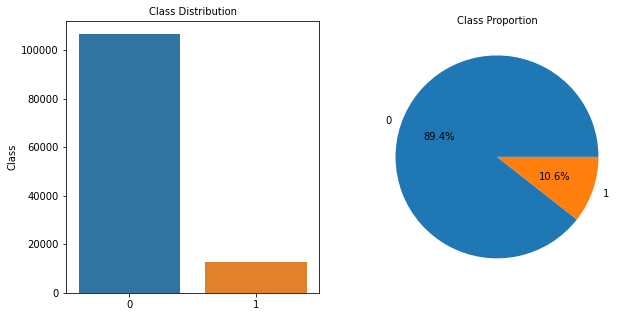

In [ ]:
class_distribution(df=train, target='Class', classes=labels)

In [ ]:
1/(89.4/10.6), (51.3/38.1)/(51.3/10.6), (51.3/10.6)/(51.3/10.6)

(0.11856823266219238, 0.27821522309711283, 1.0)

This dataset has zero NULL values.

In [ ]:
display(train.isnull().sum())

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
left_pulsar             0
right_pulsar            0
left_right_ratio        0
SDMI                    0
MSE_decoder             0
lat_1                   0
lat_2                   0
enc_1                   0
enc_2                   0
dtype: int64

### __3.2 Selecting important features__
From section 2.2, I understand that some features in the dataset are significantly useful such as: navigation angles - _ascension_ and _declination_, filters of the photometric system - _u_, _g_, _r_, _i_, _z_, and _redshift_. All other columns in the dataset are IDs.

In [ ]:
imp_cols = list(train.drop(["SDMI"],axis=1).columns)
print(imp_cols)

['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class', 'left_pulsar', 'right_pulsar', 'left_right_ratio', 'MSE_decoder', 'lat_1', 'lat_2', 'enc_1', 'enc_2']


In [ ]:
train = train[imp_cols]
test.drop("SDMI", axis=1, inplace=True)
train.shape, test.shape

((119203, 17), (78377, 16))

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,119203.0,110.498150,25.778686,5.812500,103.867188,116.359375,126.109375,189.367188
SD,119203.0,46.603498,6.203962,24.772042,43.241464,47.366033,50.835356,93.602933
EK,119203.0,0.539620,1.180960,-1.730782,0.051408,0.191626,0.408895,8.069522
Skewness,119203.0,2.074304,6.862424,-1.791886,-0.185828,0.097611,0.725708,68.101622
Mean_DMSNR_Curve,119203.0,12.483525,27.418300,0.213211,2.098662,2.819398,4.228261,217.371238
SD_DMSNR_Curve,119203.0,26.606994,20.345468,7.370432,14.996910,18.335547,25.063474,109.890785
EK_DMSNR_Curve,119203.0,7.964884,3.880844,-2.597872,6.652350,8.399445,9.966809,34.539844
Skewness_DMSNR_Curve,119203.0,92.836799,80.123918,-1.976976,47.649470,82.858366,121.721687,1191.000837
Class,119203.0,0.105752,0.307522,0.000000,0.000000,0.000000,0.000000,1.000000
left_pulsar,119203.0,14.172002,2.881451,-2.519923,14.320895,15.156972,15.718945,19.267841


### 3.4 Features Distribution Analysis:

In [ ]:
#box_plotter(df=train, features=imp_cols, target='Class')

In [ ]:
#pdf_plotter(df=train, features=imp_cols, target='Class')

**Notes**

Feature to be log-transformed:

In [ ]:
log_lost=["EK","Skewness","Mean_DMSNR_Curve","SD_DMSNR_Curve","Skewness_DMSNR_Curve","right_pulsar","left_right_ratio"]
neg_values = ['EK', 'Skewness', "Mean_DMSNR_Curve", 'Skewness_DMSNR_Curve',"right_pulsar", "left_right_ratio"]

def log_trans(dataframe, log_lost, neg_values):
  df = dataframe.copy()
  df[neg_values] = df[neg_values]+3
  df[log_lost] = np.log(df[log_lost]).values

  return df

print("Train:\n",train.min())
print("\nTest:\n",test.min())

train_v0 = log_trans(train, log_lost, neg_values)
test_v0 = log_trans(test, log_lost, neg_values)

print("\nTrain:\n",train_v0.min())
print("\nTest:\n",test_v0.min())

Train:
 Mean_Integrated          5.812500
SD                      24.772042
EK                      -1.730782
Skewness                -1.791886
Mean_DMSNR_Curve         0.213211
SD_DMSNR_Curve           7.370432
EK_DMSNR_Curve          -2.597872
Skewness_DMSNR_Curve    -1.976976
Class                    0.000000
left_pulsar             -2.519923
right_pulsar             0.095310
left_right_ratio         0.095310
MSE_decoder            -10.276604
lat_1                   -4.532253
lat_2                   -4.474874
enc_1                   -4.247185
enc_2                   -1.895105
dtype: float64

Test:
 Mean_Integrated          5.812500
SD                      24.772042
EK                      -1.788449
Skewness                -1.791886
Mean_DMSNR_Curve         0.213211
SD_DMSNR_Curve           7.448817
EK_DMSNR_Curve          -2.556795
Skewness_DMSNR_Curve    -1.976976
left_pulsar             -1.615277
right_pulsar             0.095310
left_right_ratio         0.095310
MSE_decoder      

In [ ]:
#pdf_plotter(df=train_v0, features=imp_cols, target='Class')

### **3.5 Correlation Analysis**

In [ ]:
#sampled_df = train_v0.sample(n=10_000, random_state=42)

#g = sns.pairplot(data=sampled_df,hue='Class')
#g.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02, fontsize=10)
#plt.tight_layout()
#plt.show()

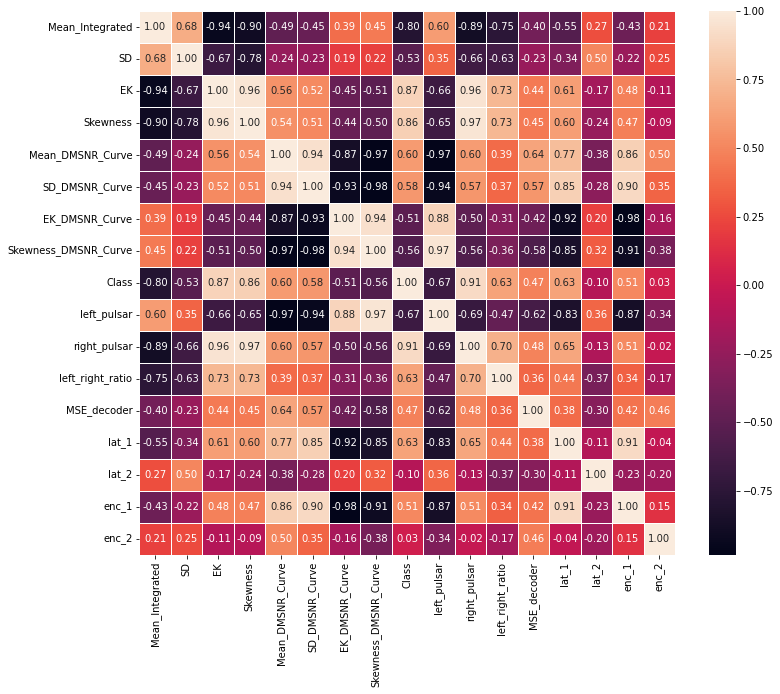

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=train_v0.corr(),
            annot=True, fmt='.2f', linewidths=0.9)
plt.show()

In [ ]:
train_v0.shape, test_v0.shape

((119203, 17), (78377, 16))

## **5.0 Models**

Models Constructors are stored in this section.

### **5.1 Autoencoder MLP - Classification**

In [ ]:
os.chdir(folder_data)
normalizer = tf.keras.layers.Normalization()

In [ ]:
def prepare_example(features, target, target_weights):

    features = tf.cast(features, dtype = tf.float32)
    target = tf.cast(target, dtype = tf.int32)
    target_weights = tf.cast(target_weights, dtype = tf.float32)

    return features, (features,target,target), target_weights

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Class")
    target_weights = dataframe.pop("weights")
    df_ = dataframe
    ds = tf.data.Dataset.from_tensor_slices((df_, labels, target_weights))
    ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.map(prepare_example,num_parallel_calls=tf.data.AUTOTUNE,deterministic=False)
    return ds

In [ ]:
def create_ae_mlp(num_columns=16, num_labels=1, hidden_units = [264,128,128,64], dropout_rates=[0, 0.25], normal_=normalizer, encode_dim=4, lr = 1e-3, Kernel=["he_normal","lecun_normal"]):

  inputs = tf.keras.layers.Input(name="inputs",shape=(num_columns),dtype=tf.float32)

  x0 = normal_(inputs)

  # Define the autoencoder architecture
  # First build the encoder
  encoder = tf.keras.layers.Dense(64, kernel_initializer=Kernel[0])(x0)
  encoder = tf.keras.layers.BatchNormalization()(encoder) #bn worsen the
  encoder = tf.keras.activations.relu(encoder)

  encoder = tf.keras.layers.Dense(32, kernel_initializer=Kernel[0])(encoder)
  encoder = tf.keras.layers.BatchNormalization()(encoder)
  encoder = tf.keras.activations.relu(encoder)

  encoder = tf.keras.layers.Dense(encode_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(encoder)

  # Then build the decoder
  decoder = tf.keras.layers.Dense(32, kernel_initializer=Kernel[0])(encoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.activations.relu(decoder)

  decoder = tf.keras.layers.Dense(64, kernel_initializer=Kernel[0])(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.activations.relu(decoder)

  # Classification Model
  x = tf.keras.layers.Concatenate()([x0, encoder])
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(dropout_rates[0])(x)

  for unit_ in hidden_units:
    x = dense_block(units=unit_,dropout_rate=dropout_rates[1],activation=tf.keras.activations.swish)(x)

  # Output Layers
  decoder = tf.keras.layers.Dense(num_columns, activation='linear', name="decoder_output")(decoder)
  class_encoder = tf.keras.layers.Dense(num_labels, activation='sigmoid', name="class_encoder")(encoder)
  main_output = tf.keras.layers.Dense(num_labels, activation='sigmoid', name="class_final")(x)

  # Model Initialization
  model = tf.keras.models.Model(inputs = inputs, outputs = (decoder, class_encoder, main_output))

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
                loss = {'decoder_output': tf.keras.losses.MeanSquaredError(name = 'loss_MSE'),
                        'class_encoder': tf.keras.losses.BinaryCrossentropy(name="SCC_enc_class"),
                        'class_final': tf.keras.losses.BinaryCrossentropy(name="SCC_final_class")},
                metrics = {'class_encoder': tf.keras.metrics.BinaryCrossentropy(name = 'SCA_enc'),
                           'class_final': tf.keras.metrics.BinaryCrossentropy(name = 'SCA_final')},
                loss_weights={'decoder_output': 0.025,
                              'class_encoder': 0.125,
                              'class_final': 0.85},
                weighted_metrics=[])
  return model

In [ ]:
resnet_model = create_ae_mlp()

resnet_model.summary()

In [ ]:
print("Total model weights:", resnet_model.count_params())
tf.keras.utils.plot_model(resnet_model, show_shapes=True, rankdir="LR") #

### 5.1.1 Train the Model:

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
i=0
eval_acc = []
eval_loss = []
eval_ck = []

for train_index, valid_index in skf.split(train_v0, train_v0["Class"]):
  print(f"\nRunning CV {i}\n")

  # Initialize Dataset:
  X_train_, X_valid_ = train_v0.iloc[train_index,:], train_v0.iloc[valid_index,:]

  X_train_["weights"] = X_train_["Class"].replace({0:0.12, 1:1.0}).values
  X_valid_["weights"] = X_valid_["Class"].replace({0:0.12, 1:1.0}).values

  train_ds = dataframe_to_dataset(X_train_)
  valid_ds = dataframe_to_dataset(X_valid_)
  train_ds = train_ds.batch(128)
  valid_ds = valid_ds.batch(128)

  # Initialize Normalizer:
  normalizer = tf.keras.layers.Normalization()
  X_norm = X_train_.drop(labels=["Class","weights"], axis=1).values
  normalizer.adapt(X_norm)

  # Initialize Model
  model_ae_mlp = create_ae_mlp(normal_=normalizer)

  # Compile the Callbacks:
  lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_class_final_SCA_final",
                                            factor=0.5,
                                            patience=15,
                                            verbose=1,
                                            mode="min")

  early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_class_final_SCA_final",
                                                patience=35,
                                                verbose=1,
                                                mode="min",
                                                restore_best_weights=True)

  checkpoint_filepath = folders_nn + 'checkpoint/'
  Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                  save_weights_only=True,
                                                  monitor="val_class_final_SCA_final",
                                                  mode='min',
                                                  restore_best_weights=True)


  # Train the model on data
  history_baseline = model_ae_mlp.fit(train_ds, epochs=250, callbacks = [early_stop, Checkpoint, lr],
                                      validation_data=valid_ds)


  plot_training_session(history_baseline)

  model_ae_mlp.load_weights(checkpoint_filepath)

  eval_metrics = model_ae_mlp.evaluate(valid_ds)
  eval_acc.append(eval_metrics[-1])

  model_ae_mlp.save(folders_nn+f'model_ae_mlp_v0/CV_{i}')

  # Test Model on Validation Set:
  y_pred = list(model_ae_mlp.predict(X_valid_.drop(["Class","weights"], axis=1).values)[2])
  y_pred = [0 if z<0.5 else 1 for z in y_pred]

  y_real = list(X_valid_["Class"])

  plot_confusion_matrix(y_real, y_pred, labels=[0,1])

  print("\n",classification_report(y_true=y_real, y_pred=y_pred))

  i +=1

  gc.collect()

print(eval_acc)

### 5.2 Spaghetti ResNet

In [ ]:
os.chdir(folder_data)
normalizer = tf.keras.layers.Normalization()

In [ ]:
def create_resnet_model(dropout_rate=0.25, num_columns=16, normal_ = normalizer, lr = 1e-3, stddev=0.05, activ="relu"):

  inputs = tf.keras.layers.Input(name="inputs",shape=(num_columns),dtype=tf.float32)

  features = normal_(inputs)

  features = tf.keras.layers.GaussianNoise(stddev=stddev, name="gsn")(features)


  # layer x
  x = dense_residual_block(64, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(features)

  # layer 0
  x0 = dense_residual_block(32, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(x)
  x0 = dense_residual_block(32, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(x0)
  # concatenate 0
  xc_0 = tf.keras.layers.concatenate([x0,x])

  # layer 1
  x1 = dense_residual_block(64, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(xc_0)
  x1 = dense_residual_block(64, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(x1)
  # concatenate 1
  xc_1 = tf.keras.layers.concatenate([x,x0,x1])

  # layer 2
  x2 = dense_residual_block(128, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(xc_1)
  x2 = dense_residual_block(128, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(x2)
  # concatenate 1
  xc_2 = tf.keras.layers.concatenate([x,x0,x1,x2])

#  # layer 3
  x3 = dense_residual_block(256, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(xc_2)
  x3 = dense_residual_block(256, dropout_rate=dropout_rate, activation=activ, kernel_regularizer=None)(x3)
  # concatenate 1
  xc_3 = tf.keras.layers.concatenate([x,x0,x1,x2,x3])

  # Output
  output = tf.keras.layers.Dense(1, activation="sigmoid")(xc_3)

  model= tf.keras.Model(inputs=inputs, outputs=output)

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
                loss = tf.keras.losses.BinaryCrossentropy(name="LogLoss_loss"),
                metrics = [tf.keras.metrics.BinaryCrossentropy(name='LogLoss_metric'),tf.keras.metrics.BinaryAccuracy(name = 'BA')])
  return model

In [ ]:
resnet_model = create_resnet_model(num_columns=136)

resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 136)]        0           []                               
                                                                                                  
 normalization_2 (Normalization  (None, 136)         273         ['inputs[0][0]']                 
 )                                                                                                
                                                                                                  
 gsn (GaussianNoise)            (None, 136)          0           ['normalization_2[0][0]']        
                                                                                                  
 dense_residual_block_14 (dense  (None, 64)          22720       ['gsn[0][0]']              

Total model weights: 505298


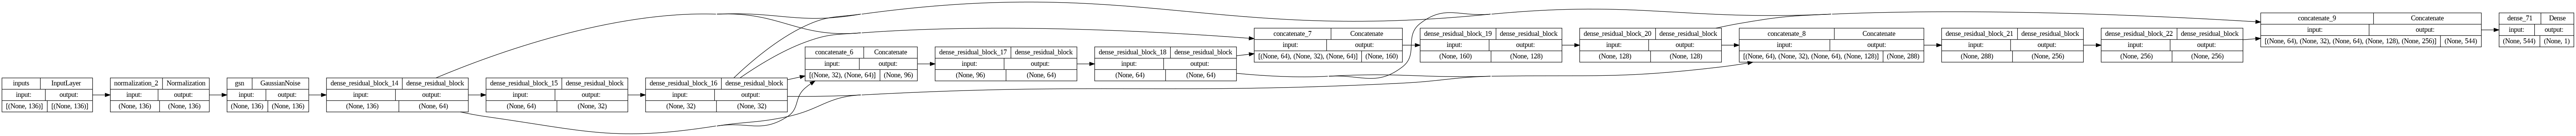

In [ ]:
print("Total model weights:", resnet_model.count_params())
tf.keras.utils.plot_model(resnet_model, show_shapes=True, rankdir="LR") #

### 5.1.1 Train the Model:

In [ ]:
target_col="Class"
X_train = train_v0.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = train_v0[f'{target_col}'].reset_index(drop=True)
X_test = test_v0.reset_index(drop=True)

In [ ]:
numeric_columns = [_ for _ in X_test.columns if 'is_generated' not in _]
#numeric_columns = numeric_columns[:8]+["lat_1",'enc_1']

In [ ]:
class Preprocessor:
    def __init__(self, numeric_columns=None, max_pattern=2):
        self.numeric_columns = numeric_columns
        self.max_pattern = max_pattern
        self.scaler = None

    def preprocess(self, X_train, X_test):

        X_train = self.create_numeric_combinations(X_train)
        X_test = self.create_numeric_combinations(X_test)

        numeric_columns = [_ for _ in X_train.columns if X_train[_].dtype == 'float']
        scaler = StandardScaler()
        X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
        X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

        return X_train, X_test

    def create_numeric_combinations(self, df):
        new_cols = []
        for comb in range(2, len(self.numeric_columns) + 1):
            for col in combinations(self.numeric_columns, comb):
                if len(col) > self.max_pattern:
                    break
                col_names = list(col)
                new_col = '_'.join(col_names) + '_mult'
                df[new_col] = df[col_names[0]]
                for c in col_names[1:]:
                    df[new_col] *= df[c]
                new_cols.append(new_col)

        return df


pp = Preprocessor(numeric_columns)
X_train, X_test = pp.preprocess(X_train, X_test)
print(f"X_train shape :{X_train.shape}", f"X_test shape :{X_test.shape}")

X_train shape :(119203, 136) X_test shape :(78377, 136)


In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)


Running CV 0

Epoch 1/250
746/746 [==============================] - 49s 36ms/step - loss: 0.0252 - LogLoss_metric: 0.0874 - BA: 0.9754 - val_loss: 0.0683 - val_LogLoss_metric: 0.0683 - val_BA: 0.9837 - lr: 0.0010
Epoch 2/250
746/746 [==============================] - 25s 33ms/step - loss: 0.0212 - LogLoss_metric: 0.0701 - BA: 0.9805 - val_loss: 0.0611 - val_LogLoss_metric: 0.0611 - val_BA: 0.9820 - lr: 0.0010
Epoch 3/250
746/746 [==============================] - 26s 35ms/step - loss: 0.0204 - LogLoss_metric: 0.0672 - BA: 0.9817 - val_loss: 0.0578 - val_LogLoss_metric: 0.0578 - val_BA: 0.9865 - lr: 0.0010
Epoch 4/250
746/746 [==============================] - 27s 36ms/step - loss: 0.0203 - LogLoss_metric: 0.0678 - BA: 0.9816 - val_loss: 0.0520 - val_LogLoss_metric: 0.0520 - val_BA: 0.9867 - lr: 0.0010
Epoch 5/250
746/746 [==============================] - 26s 35ms/step - loss: 0.0204 - LogLoss_metric: 0.0669 - BA: 0.9810 - val_loss: 0.0548 - val_LogLoss_metric: 0.0548 - val_BA: 0.984

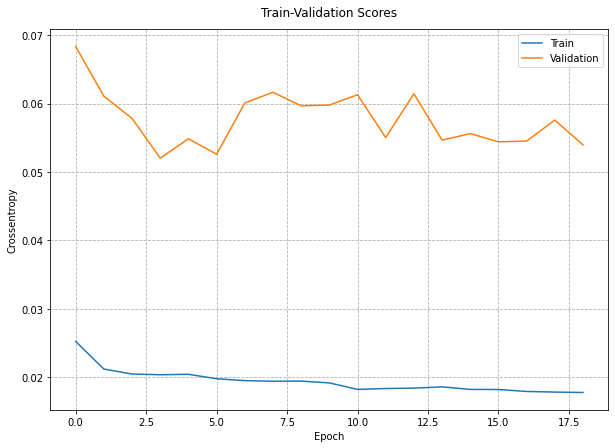

746/746 [==============================] - 4s 5ms/step - loss: 0.0520 - LogLoss_metric: 0.0520 - BA: 0.9867


746/746 [==============================] - 5s 6ms/step
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


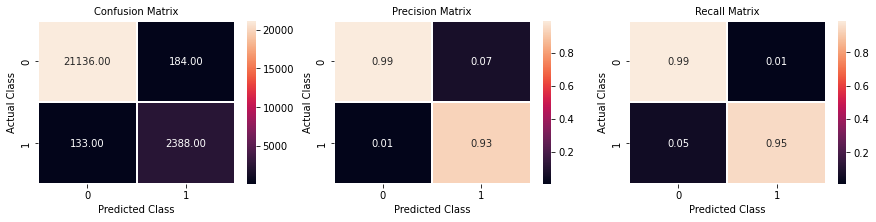


               precision    recall  f1-score   support

           0       0.99      0.99      0.99     21320
           1       0.93      0.95      0.94      2521

    accuracy                           0.99     23841
   macro avg       0.96      0.97      0.97     23841
weighted avg       0.99      0.99      0.99     23841


Running CV 1

Epoch 1/250
456/746 [=================>............] - ETA: 9s - loss: 0.0274 - LogLoss_metric: 0.0957 - BA: 0.9728

KeyboardInterrupt: ignored

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
i=0
eval_acc = []
eval_loss = []
eval_ck = []


for train_index, valid_index in skf.split(X_train, y_train):
  print(f"\nRunning CV {i}\n")

  # Initialize Dataset:
  X_t, X_v = X_train.iloc[train_index,:], X_train.iloc[valid_index,:]
  y_t, y_v = y_train.iloc[train_index], y_train.iloc[valid_index]

  #X_train_["weights"] = X_train_["Class"].replace({0:0.12, 1:1.0}).values
  #X_valid_["weights"] = X_valid_["Class"].replace({0:0.12, 1:1.0}).values

  #train_ds = dataframe_to_dataset(X_train_)
  #valid_ds = dataframe_to_dataset(X_valid_)
  #train_ds = train_ds.batch(128)
  #valid_ds = valid_ds.batch(128)

  # Initialize Normalizer:
  normalizer = tf.keras.layers.Normalization()
  X_norm = X_t.copy()
  normalizer.adapt(X_norm.values)

  # Initialize Model
  model_ae_mlp = create_resnet_model(normal_=normalizer, num_columns=136)

  # Compile the Callbacks:
  lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_LogLoss_metric",
                                            factor=0.5,
                                            patience=6,
                                            verbose=1,
                                            mode="min")

  early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_LogLoss_metric",
                                                patience=15,
                                                verbose=1,
                                                mode="min",
                                                restore_best_weights=True)

  checkpoint_filepath = folders_nn + 'checkpoint/'
  Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                  save_weights_only=True,
                                                  monitor="val_LogLoss_metric",
                                                  mode='min',
                                                  restore_best_weights=True)


  # Train the model on data
  history_baseline = model_ae_mlp.fit(X_t,y_t, epochs=250, callbacks = [early_stop, Checkpoint, lr],
                                      validation_data=(X_v,y_v), batch_size=128, class_weight={0:0.15,1:1.0})


  plot_training_session(history_baseline)

  model_ae_mlp.load_weights(checkpoint_filepath)

  eval_metrics = model_ae_mlp.evaluate(X_v,y_v)
  eval_acc.append(eval_metrics[-1])

  model_ae_mlp.save(folders_nn+f'model_resnet_v0/CV_{i}')

  # Test Model on Validation Set:
  y_pred = list(model_ae_mlp.predict(X_v))
  y_pred = [0 if z<0.5 else 1 for z in y_pred]

  y_real = y_v

  plot_confusion_matrix(y_real, y_pred, labels=[0,1])

  print("\n",classification_report(y_true=y_real, y_pred=y_pred))

  i +=1

  gc.collect()

print(eval_acc)

### 5.3 Tabnet

In [ ]:
def register_keras_custom_object(cls):
    tf.keras.utils.get_custom_objects()[cls.__name__] = cls
    return cls


def glu(x, n_units=None):
    """Generalized linear unit nonlinear activation."""
    if n_units is None:
        n_units = tf.shape(x)[-1] // 2

    return x[..., :n_units] * tf.nn.sigmoid(x[..., n_units:])

"""
Code replicated from https://github.com/tensorflow/addons/blob/master/tensorflow_addons/activations/sparsemax.py
"""

@register_keras_custom_object
@tf.function
def sparsemax(logits, axis):
    """Sparsemax activation function [1].
    For each batch `i` and class `j` we have
      $$sparsemax[i, j] = max(logits[i, j] - tau(logits[i, :]), 0)$$
    [1]: https://arxiv.org/abs/1602.02068
    Args:
        logits: Input tensor.
        axis: Integer, axis along which the sparsemax operation is applied.
    Returns:
        Tensor, output of sparsemax transformation. Has the same type and
        shape as `logits`.
    Raises:
        ValueError: In case `dim(logits) == 1`.
    """
    logits = tf.convert_to_tensor(logits, name="logits")

    # We need its original shape for shape inference.
    shape = logits.get_shape()
    rank = shape.rank
    is_last_axis = (axis == -1) or (axis == rank - 1)

    if is_last_axis:
        output = _compute_2d_sparsemax(logits)
        output.set_shape(shape)
        return output

    # If dim is not the last dimension, we have to do a transpose so that we can
    # still perform softmax on its last dimension.

    # Swap logits' dimension of dim and its last dimension.
    rank_op = tf.rank(logits)
    axis_norm = axis % rank
    logits = _swap_axis(logits, axis_norm, tf.math.subtract(rank_op, 1))

    # Do the actual softmax on its last dimension.
    output = _compute_2d_sparsemax(logits)
    output = _swap_axis(output, axis_norm, tf.math.subtract(rank_op, 1))

    # Make shape inference work since transpose may erase its static shape.
    output.set_shape(shape)
    return output


def _swap_axis(logits, dim_index, last_index, **kwargs):
    return tf.transpose(
        logits,
        tf.concat(
            [
                tf.range(dim_index),
                [last_index],
                tf.range(dim_index + 1, last_index),
                [dim_index],
            ],
            0,
        ),
        **kwargs,
    )


def _compute_2d_sparsemax(logits):
    """Performs the sparsemax operation when axis=-1."""
    shape_op = tf.shape(logits)
    obs = tf.math.reduce_prod(shape_op[:-1])
    dims = shape_op[-1]

    # In the paper, they call the logits z.
    # The mean(logits) can be substracted from logits to make the algorithm
    # more numerically stable. the instability in this algorithm comes mostly
    # from the z_cumsum. Substacting the mean will cause z_cumsum to be close
    # to zero. However, in practise the numerical instability issues are very
    # minor and substacting the mean causes extra issues with inf and nan
    # input.
    # Reshape to [obs, dims] as it is almost free and means the remanining
    # code doesn't need to worry about the rank.
    z = tf.reshape(logits, [obs, dims])

    # sort z
    z_sorted, _ = tf.nn.top_k(z, k=dims)

    # calculate k(z)
    z_cumsum = tf.math.cumsum(z_sorted, axis=-1)
    k = tf.range(1, tf.cast(dims, logits.dtype) + 1, dtype=logits.dtype)
    z_check = 1 + k * z_sorted > z_cumsum
    # because the z_check vector is always [1,1,...1,0,0,...0] finding the
    # (index + 1) of the last `1` is the same as just summing the number of 1.
    k_z = tf.math.reduce_sum(tf.cast(z_check, tf.int32), axis=-1)

    # calculate tau(z)
    # If there are inf values or all values are -inf, the k_z will be zero,
    # this is mathematically invalid and will also cause the gather_nd to fail.
    # Prevent this issue for now by setting k_z = 1 if k_z = 0, this is then
    # fixed later (see p_safe) by returning p = nan. This results in the same
    # behavior as softmax.
    k_z_safe = tf.math.maximum(k_z, 1)
    indices = tf.stack([tf.range(0, obs), tf.reshape(k_z_safe, [-1]) - 1], axis=1)
    tau_sum = tf.gather_nd(z_cumsum, indices)
    tau_z = (tau_sum - 1) / tf.cast(k_z, logits.dtype)

    # calculate p
    p = tf.math.maximum(tf.cast(0, logits.dtype), z - tf.expand_dims(tau_z, -1))
    # If k_z = 0 or if z = nan, then the input is invalid
    p_safe = tf.where(
        tf.expand_dims(
            tf.math.logical_or(tf.math.equal(k_z, 0), tf.math.is_nan(z_cumsum[:, -1])),
            axis=-1,
        ),
        tf.fill([obs, dims], tf.cast(float("nan"), logits.dtype)),
        p,
    )

    # Reshape back to original size
    p_safe = tf.reshape(p_safe, shape_op)
    return p_safe


"""
Code replicated from https://github.com/tensorflow/addons/blob/master/tensorflow_addons/layers/normalizations.py
"""


@register_keras_custom_object
class Group_Normalization(tf.keras.layers.Layer):
    """Group normalization layer.
    Group Normalization divides the channels into groups and computes
    within each group the mean and variance for normalization.
    Empirically, its accuracy is more stable than batch norm in a wide
    range of small batch sizes, if learning rate is adjusted linearly
    with batch sizes.
    Relation to Layer Normalization:
    If the number of groups is set to 1, then this operation becomes identical
    to Layer Normalization.
    Relation to Instance Normalization:
    If the number of groups is set to the
    input dimension (number of groups is equal
    to number of channels), then this operation becomes
    identical to Instance Normalization.
    Arguments
        groups: Integer, the number of groups for Group Normalization.
            Can be in the range [1, N] where N is the input dimension.
            The input dimension must be divisible by the number of groups.
        axis: Integer, the axis that should be normalized.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
        beta_constraint: Optional constraint for the beta weight.
        gamma_constraint: Optional constraint for the gamma weight.

        `features_for_coef`

    Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
    Output shape
        Same shape as input.
    References
        - [Group Normalization](https://arxiv.org/abs/1803.08494)
    """

    def __init__(
            self,
            groups: int = 2,
            axis: int = -1,
            epsilon: float = 1e-3,
            center: bool = True,
            scale: bool = True,
            beta_initializer="zeros",
            gamma_initializer="ones",
            beta_regularizer=None,
            gamma_regularizer=None,
            beta_constraint=None,
            gamma_constraint=None,
            **kwargs
    ):
        super().__init__(**kwargs)
        self.supports_masking = True
        self.groups = groups
        self.axis = axis
        self.epsilon = epsilon
        self.center = center
        self.scale = scale
        self.beta_initializer = tf.keras.initializers.get(beta_initializer)
        self.gamma_initializer = tf.keras.initializers.get(gamma_initializer)
        self.beta_regularizer = tf.keras.regularizers.get(beta_regularizer)
        self.gamma_regularizer = tf.keras.regularizers.get(gamma_regularizer)
        self.beta_constraint = tf.keras.constraints.get(beta_constraint)
        self.gamma_constraint = tf.keras.constraints.get(gamma_constraint)
        self._check_axis()

    def build(self, input_shape):

        self._check_if_input_shape_is_none(input_shape)
        self._set_number_of_groups_for_instance_norm(input_shape)
        self._check_size_of_dimensions(input_shape)
        self._create_input_spec(input_shape)

        self._add_gamma_weight(input_shape)
        self._add_beta_weight(input_shape)
        self.built = True
        super().build(input_shape)

    def call(self, inputs, training=None):
        # Training=none is just for compat with batchnorm signature call
        input_shape = tf.keras.backend.int_shape(inputs)
        tensor_input_shape = tf.shape(inputs)

        reshaped_inputs, group_shape = self._reshape_into_groups(
            inputs, input_shape, tensor_input_shape
        )

        normalized_inputs = self._apply_normalization(reshaped_inputs, input_shape)

        outputs = tf.reshape(normalized_inputs, tensor_input_shape)

        return outputs

    def get_config(self):
        config = {
            "groups": self.groups,
            "axis": self.axis,
            "epsilon": self.epsilon,
            "center": self.center,
            "scale": self.scale,
            "beta_initializer": tf.keras.initializers.serialize(self.beta_initializer),
            "gamma_initializer": tf.keras.initializers.serialize(
                self.gamma_initializer
            ),
            "beta_regularizer": tf.keras.regularizers.serialize(self.beta_regularizer),
            "gamma_regularizer": tf.keras.regularizers.serialize(
                self.gamma_regularizer
            ),
            "beta_constraint": tf.keras.constraints.serialize(self.beta_constraint),
            "gamma_constraint": tf.keras.constraints.serialize(self.gamma_constraint),
        }
        base_config = super().get_config()
        return {**base_config, **config}

    def compute_output_shape(self, input_shape):
        return input_shape

    def _reshape_into_groups(self, inputs, input_shape, tensor_input_shape):

        group_shape = [tensor_input_shape[i] for i in range(len(input_shape))]
        group_shape[self.axis] = input_shape[self.axis] // self.groups
        group_shape.insert(self.axis, self.groups)
        group_shape = tf.stack(group_shape)
        reshaped_inputs = tf.reshape(inputs, group_shape)
        return reshaped_inputs, group_shape

    def _apply_normalization(self, reshaped_inputs, input_shape):

        group_shape = tf.keras.backend.int_shape(reshaped_inputs)
        group_reduction_axes = list(range(1, len(group_shape)))
        axis = -2 if self.axis == -1 else self.axis - 1
        group_reduction_axes.pop(axis)

        mean, variance = tf.nn.moments(
            reshaped_inputs, group_reduction_axes, keepdims=True
        )

        gamma, beta = self._get_reshaped_weights(input_shape)
        normalized_inputs = tf.nn.batch_normalization(
            reshaped_inputs,
            mean=mean,
            variance=variance,
            scale=gamma,
            offset=beta,
            variance_epsilon=self.epsilon,
        )
        return normalized_inputs

    def _get_reshaped_weights(self, input_shape):
        broadcast_shape = self._create_broadcast_shape(input_shape)
        gamma = None
        beta = None
        if self.scale:
            gamma = tf.reshape(self.gamma, broadcast_shape)

        if self.center:
            beta = tf.reshape(self.beta, broadcast_shape)
        return gamma, beta

    def _check_if_input_shape_is_none(self, input_shape):
        dim = input_shape[self.axis]
        if dim is None:
            raise ValueError(
                "Axis " + str(self.axis) + " of "
                                           "input tensor should have a defined dimension "
                                           "but the layer received an input with shape " + str(input_shape) + "."
            )

    def _set_number_of_groups_for_instance_norm(self, input_shape):
        dim = input_shape[self.axis]

        if self.groups == -1:
            self.groups = dim

    def _check_size_of_dimensions(self, input_shape):

        dim = input_shape[self.axis]
        if dim < self.groups:
            raise ValueError(
                "Number of groups (" + str(self.groups) + ") cannot be "
                                                          "more than the number of channels (" + str(dim) + ")."
            )

        if dim % self.groups != 0:
            raise ValueError(
                "Number of groups (" + str(self.groups) + ") must be a "
                                                          "multiple of the number of channels (" + str(dim) + ")."
            )

    def _check_axis(self):

        if self.axis == 0:
            raise ValueError(
                "You are trying to normalize your batch axis. Do you want to "
                "use tf.layer.batch_normalization instead"
            )

    def _create_input_spec(self, input_shape):

        dim = input_shape[self.axis]
        self.input_spec = tf.keras.layers.InputSpec(
            ndim=len(input_shape), axes={self.axis: dim}
        )

    def _add_gamma_weight(self, input_shape):

        dim = input_shape[self.axis]
        shape = (dim,)

        if self.scale:
            self.gamma = self.add_weight(
                shape=shape,
                name="gamma",
                initializer=self.gamma_initializer,
                regularizer=self.gamma_regularizer,
                constraint=self.gamma_constraint,
            )
        else:
            self.gamma = None

    def _add_beta_weight(self, input_shape):

        dim = input_shape[self.axis]
        shape = (dim,)

        if self.center:
            self.beta = self.add_weight(
                shape=shape,
                name="beta",
                initializer=self.beta_initializer,
                regularizer=self.beta_regularizer,
                constraint=self.beta_constraint,
            )
        else:
            self.beta = None

    def _create_broadcast_shape(self, input_shape):
        broadcast_shape = [1] * len(input_shape)
        broadcast_shape[self.axis] = input_shape[self.axis] // self.groups
        broadcast_shape.insert(self.axis, self.groups)
        return broadcast_shape

In [ ]:
class TransformBlock(tf.keras.Model):

    def __init__(self, features,
                 norm_type,
                 momentum=0.9,
                 virtual_batch_size=None,
                 groups=2,
                 block_name='',
                 **kwargs):
        super(TransformBlock, self).__init__(**kwargs)

        self.features = features
        self.norm_type = norm_type
        self.momentum = momentum
        self.groups = groups
        self.virtual_batch_size = virtual_batch_size

        self.transform = tf.keras.layers.Dense(self.features, use_bias=False, name=f'transformblock_dense_{block_name}')

        if norm_type == 'batch':
            self.bn = tf.keras.layers.BatchNormalization(axis=-1, momentum=momentum,
                                                         virtual_batch_size=virtual_batch_size,
                                                         name=f'transformblock_bn_{block_name}')

        else:
            self.bn = Group_Normalization(axis=-1, groups=self.groups, name=f'transformblock_gn_{block_name}')

    def call(self, inputs, training=None):
        x = self.transform(inputs)
        x = self.bn(x, training=training)
        return x


class TabNet(tf.keras.Model):

    def __init__(self, feature_columns,
                 feature_dim=64,
                 output_dim=64,
                 num_features=None,
                 num_decision_steps=5,
                 relaxation_factor=1.5,
                 sparsity_coefficient=1e-5,
                 norm_type='group',
                 batch_momentum=0.98,
                 virtual_batch_size=None,
                 num_groups=2,
                 epsilon=1e-5,
                 random_state = None,
                 **kwargs):
        """
        Tensorflow 2.0 implementation of [TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/abs/1908.07442)
        # Hyper Parameter Tuning (Excerpt from the paper)
        We consider datasets ranging from ∼10K to ∼10M training points, with varying degrees of fitting
        difficulty. TabNet obtains high performance for all with a few general principles on hyperparameter
        selection:
            - Most datasets yield the best results for Nsteps ∈ [3, 10]. Typically, larger datasets and
            more complex tasks require a larger Nsteps. A very high value of Nsteps may suffer from
            overfitting and yield poor generalization.
            - Adjustment of the values of Nd and Na is the most efficient way of obtaining a trade-off
            between performance and complexity. Nd = Na is a reasonable choice for most datasets. A
            very high value of Nd and Na may suffer from overfitting and yield poor generalization.
            - An optimal choice of γ can have a major role on the overall performance. Typically a larger
            Nsteps value favors for a larger γ.
            - A large batch size is beneficial for performance - if the memory constraints permit, as large
            as 1-10 % of the total training dataset size is suggested. The virtual batch size is typically
            much smaller than the batch size.
            - Initially large learning rate is important, which should be gradually decayed until convergence.
        Args:
            feature_columns: The Tensorflow feature columns for the dataset.
            feature_dim (N_a): Dimensionality of the hidden representation in feature
                transformation block. Each layer first maps the representation to a
                2*feature_dim-dimensional output and half of it is used to determine the
                nonlinearity of the GLU activation where the other half is used as an
                input to GLU, and eventually feature_dim-dimensional output is
                transferred to the next layer.
            output_dim (N_d): Dimensionality of the outputs of each decision step, which is
                later mapped to the final classification or regression output.
            num_features: The number of input features (i.e the number of columns for
                tabular data assuming each feature is represented with 1 dimension).
            num_decision_steps(N_steps): Number of sequential decision steps.
            relaxation_factor (gamma): Relaxation factor that promotes the reuse of each
                feature at different decision steps. When it is 1, a feature is enforced
                to be used only at one decision step and as it increases, more
                flexibility is provided to use a feature at multiple decision steps.
            sparsity_coefficient (lambda_sparse): Strength of the sparsity regularization.
                Sparsity may provide a favorable inductive bias for convergence to
                higher accuracy for some datasets where most of the input features are redundant.
            norm_type: Type of normalization to perform for the model. Can be either
                'batch' or 'group'. 'group' is the default.
            batch_momentum: Momentum in ghost batch normalization.
            virtual_batch_size: Virtual batch size in ghost batch normalization. The
                overall batch size should be an integer multiple of virtual_batch_size.
            num_groups: Number of groups used for group normalization.
            epsilon: A small number for numerical stability of the entropy calculations.
        """
        super(TabNet, self).__init__(**kwargs)
        if random_state is not None:
            tf.keras.utils.set_random_seed(random_state)

        # Input checks
        if feature_columns is not None:
            if type(feature_columns) not in (list, tuple):
                raise ValueError("`feature_columns` must be a list or a tuple.")

            if len(feature_columns) == 0:
                raise ValueError("`feature_columns` must be contain at least 1 tf.feature_column !")

            if num_features is None:
                num_features = len(feature_columns)
            else:
                num_features = int(num_features)

        else:
            if num_features is None:
                raise ValueError("If `feature_columns` is None, then `num_features` cannot be None.")

        if num_decision_steps < 1:
            raise ValueError("Num decision steps must be greater than 0.")

        if feature_dim < output_dim: # Orig<=
            raise ValueError("To compute `features_for_coef`, feature_dim must be larger than output dim")

        feature_dim = int(feature_dim)
        output_dim = int(output_dim)
        num_decision_steps = int(num_decision_steps)
        relaxation_factor = float(relaxation_factor)
        sparsity_coefficient = float(sparsity_coefficient)
        batch_momentum = float(batch_momentum)
        num_groups = max(1, int(num_groups))
        epsilon = float(epsilon)

        if relaxation_factor < 0.:
            raise ValueError("`relaxation_factor` cannot be negative !")

        if sparsity_coefficient < 0.:
            raise ValueError("`sparsity_coefficient` cannot be negative !")

        if virtual_batch_size is not None:
            virtual_batch_size = int(virtual_batch_size)

        if norm_type not in ['batch', 'group']:
            raise ValueError("`norm_type` must be either `batch` or `group`")

        self.feature_columns = feature_columns
        self.num_features = num_features
        self.feature_dim = feature_dim
        self.output_dim = output_dim

        self.num_decision_steps = num_decision_steps
        self.relaxation_factor = relaxation_factor
        self.sparsity_coefficient = sparsity_coefficient
        self.norm_type = norm_type
        self.batch_momentum = batch_momentum
        self.virtual_batch_size = virtual_batch_size
        self.num_groups = num_groups
        self.epsilon = epsilon

        if num_decision_steps > 1:
            features_for_coeff = feature_dim - output_dim
            print(f"[TabNet]: {features_for_coeff} features will be used for decision steps.")

        if self.feature_columns is not None:
            self.input_features = tf.keras.layers.DenseFeatures(feature_columns, trainable=True)

            if self.norm_type == 'batch':
                self.input_bn = tf.keras.layers.BatchNormalization(axis=-1, momentum=batch_momentum, name='input_bn')
            else:
                self.input_bn = Group_Normalization(axis=-1, groups=self.num_groups, name='input_gn')

        else:
            self.input_features = None
            self.input_bn = None

        self.transform_f1 = TransformBlock(2 * self.feature_dim, self.norm_type,
                                           self.batch_momentum, self.virtual_batch_size, self.num_groups,
                                           block_name='f1')

        self.transform_f2 = TransformBlock(2 * self.feature_dim, self.norm_type,
                                           self.batch_momentum, self.virtual_batch_size, self.num_groups,
                                           block_name='f2')

        self.transform_f3_list = [
            TransformBlock(2 * self.feature_dim, self.norm_type,
                           self.batch_momentum, self.virtual_batch_size, self.num_groups, block_name=f'f3_{i}')
            for i in range(self.num_decision_steps)
        ]

        self.transform_f4_list = [
            TransformBlock(2 * self.feature_dim, self.norm_type,
                           self.batch_momentum, self.virtual_batch_size, self.num_groups, block_name=f'f4_{i}')
            for i in range(self.num_decision_steps)
        ]

        self.transform_coef_list = [
            TransformBlock(self.num_features, self.norm_type,
                           self.batch_momentum, self.virtual_batch_size, self.num_groups, block_name=f'coef_{i}')
            for i in range(self.num_decision_steps - 1)
        ]

        self._step_feature_selection_masks = None
        self._step_aggregate_feature_selection_mask = None

    def call(self, inputs, training=None):
        if self.input_features is not None:
            features = self.input_features(inputs)
            features = self.input_bn(features, training=training)

        else:
            features = inputs

        batch_size = tf.shape(features)[0]
        self._step_feature_selection_masks = []
        self._step_aggregate_feature_selection_mask = None

        # Initializes decision-step dependent variables.
        output_aggregated = tf.zeros([batch_size, self.output_dim])
        masked_features = features
        mask_values = tf.zeros([batch_size, self.num_features])
        aggregated_mask_values = tf.zeros([batch_size, self.num_features])
        complementary_aggregated_mask_values = tf.ones(
            [batch_size, self.num_features])

        total_entropy = 0.0
        entropy_loss = 0.

        for ni in range(self.num_decision_steps):
            # Feature transformer with two shared and two decision step dependent
            # blocks is used below.=
            transform_f1 = self.transform_f1(masked_features, training=training)
            transform_f1 = glu(transform_f1, self.feature_dim)

            transform_f2 = self.transform_f2(transform_f1, training=training)
            transform_f2 = (glu(transform_f2, self.feature_dim) +
                            transform_f1) * tf.math.sqrt(0.5)

            transform_f3 = self.transform_f3_list[ni](transform_f2, training=training)
            transform_f3 = (glu(transform_f3, self.feature_dim) +
                            transform_f2) * tf.math.sqrt(0.5)

            transform_f4 = self.transform_f4_list[ni](transform_f3, training=training)
            transform_f4 = (glu(transform_f4, self.feature_dim) +
                            transform_f3) * tf.math.sqrt(0.5)

            if (ni > 0 or self.num_decision_steps == 1):
                decision_out = tf.nn.relu(transform_f4[:, :self.output_dim])

                # Decision aggregation.
                output_aggregated += decision_out

                # Aggregated masks are used for visualization of the
                # feature importance attributes.
                scale_agg = tf.reduce_sum(decision_out, axis=1, keepdims=True)

                if self.num_decision_steps > 1:
                    scale_agg = scale_agg / tf.cast(self.num_decision_steps - 1, tf.float32)

                aggregated_mask_values += mask_values * scale_agg

            features_for_coef = transform_f4[:, self.output_dim:]

            if ni < (self.num_decision_steps - 1):
                # Determines the feature masks via linear and nonlinear
                # transformations, taking into account of aggregated feature use.
                mask_values = self.transform_coef_list[ni](features_for_coef, training=training)
                mask_values *= complementary_aggregated_mask_values
                mask_values = sparsemax(mask_values, axis=-1)

                # Relaxation factor controls the amount of reuse of features between
                # different decision blocks and updated with the values of
                # coefficients.
                complementary_aggregated_mask_values *= (
                        self.relaxation_factor - mask_values)

                # Entropy is used to penalize the amount of sparsity in feature
                # selection.
                total_entropy += tf.reduce_mean(
                    tf.reduce_sum(
                        -mask_values * tf.math.log(mask_values + self.epsilon), axis=1)) / (
                                     tf.cast(self.num_decision_steps - 1, tf.float32))

                # Add entropy loss
                entropy_loss = total_entropy

                # Feature selection.
                masked_features = tf.multiply(mask_values, features)

                # Visualization of the feature selection mask at decision step ni
                # tf.summary.image(
                #     "Mask for step" + str(ni),
                #     tf.expand_dims(tf.expand_dims(mask_values, 0), 3),
                #     max_outputs=1)
                mask_at_step_i = tf.expand_dims(tf.expand_dims(mask_values, 0), 3)
                self._step_feature_selection_masks.append(mask_at_step_i)

            else:
                # This branch is needed for correct compilation by tf.autograph
                entropy_loss = 0.

        # Adds the loss automatically
        self.add_loss(self.sparsity_coefficient * entropy_loss)

        # Visualization of the aggregated feature importances
        # tf.summary.image(
        #     "Aggregated mask",
        #     tf.expand_dims(tf.expand_dims(aggregated_mask_values, 0), 3),
        #     max_outputs=1)

        agg_mask = tf.expand_dims(tf.expand_dims(aggregated_mask_values, 0), 3)
        self._step_aggregate_feature_selection_mask = agg_mask

        return output_aggregated

    @property
    def feature_selection_masks(self):
        return self._step_feature_selection_masks

    @property
    def aggregate_feature_selection_mask(self):
        return self._step_aggregate_feature_selection_mask


class TabNetClassifier(tf.keras.Model):

    def __init__(self, feature_columns,
                 num_classes,
                 num_features=None,
                 feature_dim=64,
                 output_dim=64,
                 num_decision_steps=5,
                 relaxation_factor=1.5,
                 sparsity_coefficient=1e-5,
                 norm_type='group',
                 batch_momentum=0.98,
                 virtual_batch_size=None,
                 num_groups=2,
                 epsilon=1e-5,
                 random_state = None,
                 **kwargs):
        """
        Tensorflow 2.0 implementation of [TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/abs/1908.07442)
        # Hyper Parameter Tuning (Excerpt from the paper)
        We consider datasets ranging from ∼10K to ∼10M training points, with varying degrees of fitting
        difficulty. TabNet obtains high performance for all with a few general principles on hyperparameter
        selection:
            - Most datasets yield the best results for Nsteps ∈ [3, 10]. Typically, larger datasets and
            more complex tasks require a larger Nsteps. A very high value of Nsteps may suffer from
            overfitting and yield poor generalization.
            - Adjustment of the values of Nd and Na is the most efficient way of obtaining a trade-off
            between performance and complexity. Nd = Na is a reasonable choice for most datasets. A
            very high value of Nd and Na may suffer from overfitting and yield poor generalization.
            - An optimal choice of γ can have a major role on the overall performance. Typically a larger
            Nsteps value favors for a larger γ.
            - A large batch size is beneficial for performance - if the memory constraints permit, as large
            as 1-10 % of the total training dataset size is suggested. The virtual batch size is typically
            much smaller than the batch size.
            - Initially large learning rate is important, which should be gradually decayed until convergence.
        Args:
            feature_columns: The Tensorflow feature columns for the dataset.
            num_classes: Number of classes.
            feature_dim (N_a): Dimensionality of the hidden representation in feature
                transformation block. Each layer first maps the representation to a
                2*feature_dim-dimensional output and half of it is used to determine the
                nonlinearity of the GLU activation where the other half is used as an
                input to GLU, and eventually feature_dim-dimensional output is
                transferred to the next layer.
            output_dim (N_d): Dimensionality of the outputs of each decision step, which is
                later mapped to the final classification or regression output.
            num_features: The number of input features (i.e the number of columns for
                tabular data assuming each feature is represented with 1 dimension).
            num_decision_steps(N_steps): Number of sequential decision steps.
            relaxation_factor (gamma): Relaxation factor that promotes the reuse of each
                feature at different decision steps. When it is 1, a feature is enforced
                to be used only at one decision step and as it increases, more
                flexibility is provided to use a feature at multiple decision steps.
            sparsity_coefficient (lambda_sparse): Strength of the sparsity regularization.
                Sparsity may provide a favorable inductive bias for convergence to
                higher accuracy for some datasets where most of the input features are redundant.
            norm_type: Type of normalization to perform for the model. Can be either
                'group' or 'group'. 'group' is the default.
            batch_momentum: Momentum in ghost batch normalization.
            virtual_batch_size: Virtual batch size in ghost batch normalization. The
                overall batch size should be an integer multiple of virtual_batch_size.
            num_groups: Number of groups used for group normalization.
            epsilon: A small number for numerical stability of the entropy calculations.
        """
        super(TabNetClassifier, self).__init__(**kwargs)

        self.num_classes = num_classes

        self.tabnet = TabNet(feature_columns=feature_columns,
                             num_features=num_features,
                             feature_dim=feature_dim,
                             output_dim=output_dim,
                             num_decision_steps=num_decision_steps,
                             relaxation_factor=relaxation_factor,
                             sparsity_coefficient=sparsity_coefficient,
                             norm_type=norm_type,
                             batch_momentum=batch_momentum,
                             virtual_batch_size=virtual_batch_size,
                             num_groups=num_groups,
                             epsilon=epsilon,
                             random_state=random_state,
                             **kwargs)
        if num_classes==1:
          self.clf = tf.keras.layers.Dense(num_classes, activation='sigmoid', use_bias=False, name='classifier')
        else:
          self.clf = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=False, name='classifier')




    def call(self, inputs, training=None):
        self.activations = self.tabnet(inputs, training=training)
        out = self.clf(self.activations)

        return out

    def summary(self, *super_args, **super_kwargs):
        super().summary(*super_args, **super_kwargs)
        self.tabnet.summary(*super_args, **super_kwargs)

#############################################################################################################


In [ ]:
os.chdir(folder_data)
normalizer = tf.keras.layers.Normalization()
###################################################
def create_tabnet_model(normal_=normalizer, stddev=0.05, lr = 1e-3):

  input = tf.keras.layers.Input(shape=(136,))

  features = normal_(input)

  features = tf.keras.layers.GaussianNoise(stddev=stddev, name="gsn")(features)

  outputs = TabNetClassifier(feature_columns=None, num_classes=1, num_features=136,
                    feature_dim=32, output_dim=32,
                    num_decision_steps=5, relaxation_factor=1.5,
                    sparsity_coefficient=0.5, batch_momentum=0.98,
                    virtual_batch_size=None, norm_type='group',
                    num_groups=4)(features)

  model = tf.keras.Model(inputs=input, outputs=outputs)

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
                loss = tf.keras.losses.BinaryCrossentropy(name="LogLoss_loss"),
                metrics = [tf.keras.metrics.BinaryCrossentropy(name='LogLoss_metric'),tf.keras.metrics.BinaryAccuracy(name = 'BA')])

  return model

In [ ]:
model_tabnet = create_tabnet_model()

[TabNet]: 0 features will be used for decision steps.


In [ ]:
model_tabnet.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 136)]             0         
                                                                 
 normalization_5 (Normalizat  (None, 136)              273       
 ion)                                                            
                                                                 
 gsn (GaussianNoise)         (None, 136)               0         
                                                                 
 tab_net_classifier_5 (TabNe  (None, 1)                33888     
 tClassifier)                                                    
                                                                 
Total params: 34,161
Trainable params: 33,888
Non-trainable params: 273
_________________________________________________________________


### 5.3.1 Train the Model:

In [ ]:
target_col="Class"
X_train = train_v0.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = train_v0[f'{target_col}'].reset_index(drop=True)
X_test = test_v0.reset_index(drop=True)

In [ ]:
numeric_columns = [_ for _ in X_test.columns if 'is_generated' not in _]
#numeric_columns = numeric_columns[:8]+["lat_1",'enc_1']

In [ ]:
class Preprocessor:
    def __init__(self, numeric_columns=None, max_pattern=2):
        self.numeric_columns = numeric_columns
        self.max_pattern = max_pattern
        self.scaler = None

    def preprocess(self, X_train, X_test):

        X_train = self.create_numeric_combinations(X_train)
        X_test = self.create_numeric_combinations(X_test)

        numeric_columns = [_ for _ in X_train.columns if X_train[_].dtype == 'float']
        scaler = StandardScaler()
        X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
        X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

        return X_train, X_test

    def create_numeric_combinations(self, df):
        new_cols = []
        for comb in range(2, len(self.numeric_columns) + 1):
            for col in combinations(self.numeric_columns, comb):
                if len(col) > self.max_pattern:
                    break
                col_names = list(col)
                new_col = '_'.join(col_names) + '_mult'
                df[new_col] = df[col_names[0]]
                for c in col_names[1:]:
                    df[new_col] *= df[c]
                new_cols.append(new_col)

        return df


pp = Preprocessor(numeric_columns)
X_train, X_test = pp.preprocess(X_train, X_test)
print(f"X_train shape :{X_train.shape}", f"X_test shape :{X_test.shape}")

X_train shape :(119203, 136) X_test shape :(78377, 136)


In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
i=0
eval_acc = []
eval_loss = []
eval_ck = []


for train_index, valid_index in skf.split(X_train, y_train):
  print(f"\nRunning CV {i}\n")

  # Initialize Dataset:
  X_t, X_v = X_train.iloc[train_index,:], X_train.iloc[valid_index,:]
  y_t, y_v = y_train.iloc[train_index], y_train.iloc[valid_index]

  #X_train_["weights"] = X_train_["Class"].replace({0:0.12, 1:1.0}).values
  #X_valid_["weights"] = X_valid_["Class"].replace({0:0.12, 1:1.0}).values

  #train_ds = dataframe_to_dataset(X_train_)
  #valid_ds = dataframe_to_dataset(X_valid_)
  #train_ds = train_ds.batch(128)
  #valid_ds = valid_ds.batch(128)

  # Initialize Normalizer:
  normalizer = tf.keras.layers.Normalization()
  X_norm = X_t.copy()
  normalizer.adapt(X_norm.values)

  # Initialize Model
  tabnet_model = create_tabnet_model(normal_=normalizer, stddev=0.05, lr = 1e-4)
  tabnet_model.load_weights(checkpoint_filepath)

  # Compile the Callbacks:
  lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_LogLoss_metric",
                                            factor=0.5,
                                            patience=6,
                                            verbose=1,
                                            mode="min")

  early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_LogLoss_metric",
                                                patience=15,
                                                verbose=1,
                                                mode="min",
                                                restore_best_weights=True)

  checkpoint_filepath = folders_nn + 'checkpoint/'
  Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                  save_weights_only=True,
                                                  monitor="val_LogLoss_metric",
                                                  mode='min',
                                                  restore_best_weights=True)


  # Train the model on data
  history_baseline = tabnet_model.fit(X_t,y_t, epochs=250, callbacks = [early_stop, Checkpoint, lr],
                                      validation_data=(X_v,y_v), batch_size=128, class_weight={0:0.15,1:1.0})


  plot_training_session(history_baseline)

  tabnet_model.load_weights(checkpoint_filepath)

  eval_metrics = tabnet_model.evaluate(X_v,y_v)
  eval_acc.append(eval_metrics[-1])

  tabnet_model.save(folders_nn+f'model_tabnet_v0/CV_{i}')

  # Test Model on Validation Set:
  y_pred = list(tabnet_model.predict(X_v))
  y_pred = [0 if z<0.5 else 1 for z in y_pred]

  y_real = y_v

  plot_confusion_matrix(y_real, y_pred, labels=[0,1])

  print("\n",classification_report(y_true=y_real, y_pred=y_pred))

  i +=1

  gc.collect()

print(eval_acc)


Running CV 0

[TabNet]: 0 features will be used for decision steps.
Epoch 1/250
746/746 [==============================] - 104s 42ms/step - loss: 0.0178 - LogLoss_metric: 0.0581 - BA: 0.9840 - val_loss: 0.0537 - val_LogLoss_metric: 0.0537 - val_BA: 0.9859 - lr: 0.0010
Epoch 2/250
746/746 [==============================] - 30s 41ms/step - loss: 0.0177 - LogLoss_metric: 0.0579 - BA: 0.9838 - val_loss: 0.0606 - val_LogLoss_metric: 0.0606 - val_BA: 0.9842 - lr: 0.0010
Epoch 3/250
611/746 [=======================>......] - ETA: 4s - loss: 0.0177 - LogLoss_metric: 0.0584 - BA: 0.9840

KeyboardInterrupt: ignored

## 5.3 CatBoostClassifier

In [ ]:
#define parameters
x_train = train_v0.drop('Class', axis=1)
y_train = train_v0['Class']
predictions, scores = np.zeros(len(test_v0)), []

config={'learning_rate':0.01,
       'iterations':5000,
       'verbose':True,
        'early_stopping_rounds':250,
        'max_depth':6,
        'boosting_type': 'Ordered',
        'bootstrap_type': 'Bayesian',
        'bagging_temperature': 0.2,
       'loss_function':'Logloss',
       'eval_metric':'Logloss',
       'random_seed':4396,
       'use_best_model':True,
        'task_type':'GPU',
       }

config = {
            'iterations': 5000,
            'early_stopping_rounds':250,
            "depth": 3,
            "learning_rate": 0.08085612007223575,
            "l2_leaf_reg": 0.018480476349201046,
            "random_strength": 0.10466887211666757,
            "max_bin": 226,
            "one_hot_max_size": 92,
            "grow_policy": "Depthwise",
            "bootstrap_type": "Bayesian",
            "od_type": "Iter",
            'loss_function': 'Logloss',
            #'task_type': "GPU",
            'use_best_model':True,
        }

config =  {'colsample_bylevel': 0.9122807178002814,
            'eval_metric': 'Logloss',
            'iterations': 5000,
            'l2_leaf_reg': 0.8751327958077045,
            'learning_rate': 0.04519264945131604,
            'max_depth': 4
          }

FOLDS=5
seed = 42
np.random.seed(seed)

In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(x_train, y_train)):

    train = cat.Pool(data=x_train.iloc[train_idx],label=y_train.iloc[train_idx])
    valid = cat.Pool(data=x_train.iloc[val_idx],label=y_train.iloc[val_idx])

    x_train_calibration = x_train.iloc[train_idx]
    y_train_calibration = y_train.iloc[train_idx]

    model = CatBoostClassifier(**config)
    model.fit(train,eval_set=(valid),plot=False)

    calibrated = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
    calibrated.fit(x_train_calibration, y_train_calibration)

    valid_pred = calibrated.predict_proba(valid)[:,1]
    valid_score = log_loss(y_train.iloc[val_idx], valid_pred)

    predictions += calibrated.predict_proba(test_v0)[:,1] / FOLDS
    direc = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/catboost_v3/CV_{fold}"

    try:
        os.mkdir(direc)
    except OSError as error:
        print(f"{direc} already exists")

    os.chdir(direc)
    model.save_model('catboost_depth_7')

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    scores.append(valid_score)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')

In [ ]:
plt.plot(predictions)

In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])
ss.Class=predictions

In [ ]:
ss.to_csv("Catboost_sub_v2.csv")

##5.4 LGBMClassifier

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)
#define parameters
predictions, scores = np.zeros(len(test_v0)), []

lgb_params = {
              'n_estimators': 5000,
              "max_depth": 3,
              "learning_rate": 0.12337163433290158,
              "subsample": 0.06825590292262261,
              "colsample_bytree": 0.5007234020663031,
              "reg_alpha": 0.24913356166694103,
              "reg_lambda": 0.07791914177739326,
              'objective': 'binary',
              'metric': 'binary_logloss',
              'boosting_type': 'gbdt'
              }

lgb_params_0 = {'lambda_l1': 0.002351730102069405,
               'lambda_l2': 8.620764120953048,
               'bagging_freq': 4,
               'bagging_fraction': 0.5513100564762595,
               'feature_fraction': 0.7853392245368107,
               'verbosity': 5,
               'objective': 'binary_logloss',
               'learning_rate': 0.1,
               'reg_lambda': 1.0,
               'reg_alpha': 0.1,
               'max_depth': 5,
               'n_estimators': 10000,
               'colsample_bytree': 0.5,
               'min_child_samples': 10,
               'subsample_freq': 3,
               'subsample': 0.9,
               'importance_type': 'gain',
               'random_state': 71,
               'num_leaves': 62}

In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(x_train, y_train)):

    X_train, X_valid = train_v0.iloc[train_idx,:], train_v0.iloc[val_idx,:]

    X_train_ = X_train.drop("Class", axis=1)
    y_train_ = X_train["Class"]
    X_valid_ = X_valid.drop("Class", axis=1)
    y_valid_ = X_valid["Class"]

    eval_set = [(X_valid_, y_valid_)]
    train_set = [(X_train_, y_train_)]

    model = lgb.LGBMClassifier(**lgb_params)
    model.fit(X_train_,y_train_, early_stopping_rounds=250, eval_set=eval_set, verbose=True)

    valid_pred = model.predict_proba(X_valid_)[:,1]
    valid_score = log_loss(y_train.iloc[val_idx], valid_pred)

    predictions += model.predict_proba(test_v0)[:,1] / FOLDS
    os.chdir(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/LGBM_v0/CV_{fold}")
    model.booster_.save_model('lgb_reg_v0.txt', num_iteration=model.best_iteration_)

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    scores.append(valid_score)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

In [ ]:
plt.plot(predictions);

In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])
ss.Class=predictions

In [ ]:
ss.to_csv("LGBMClassifier_sub_v0.csv")

##5.5 XGBoost

In [ ]:
#define parameters
x_train = train_v0.drop('Class', axis=1)
y_train = train_v0['Class']

tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)
#define parameters
predictions, scores = np.zeros(len(test_v0)), []

xgb_params = {
              'n_estimators': 5000,
              "max_depth": 3,
              "learning_rate": 0.13758648333409265,
              "min_child_weight": 8,
              "gamma": 0.011643317109940621,
              "subsample": 0.6447402312818076,
              "colsample_bytree": 0.527329284230269,
              "reg_alpha": 0.14151490274336978,
              "reg_lambda": 0.00031129696984688186,
              'n_jobs': -1,
              'objective': 'binary:logistic',
              'verbosity': 0,
              'eval_metric': 'logloss'
              }

In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(x_train, y_train)):

    X_train, X_valid = train_v0.iloc[train_idx,:], train_v0.iloc[val_idx,:]

    X_train_ = X_train.drop("Class", axis=1)
    y_train_ = X_train["Class"]
    X_valid_ = X_valid.drop("Class", axis=1)
    y_valid_ = X_valid["Class"]

    eval_set = [(X_valid_, y_valid_)]
    train_set = [(X_train_, y_train_)]

    model = XGBClassifier(**xgb_params)
    model.fit(X_train_,y_train_, early_stopping_rounds=250, eval_set=eval_set, verbose=True)

    valid_pred = model.predict_proba(X_valid_)[:,1]
    valid_score = log_loss(y_train.iloc[val_idx], valid_pred)

    predictions += model.predict_proba(test_v0)[:,1] / FOLDS
    os.chdir(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/XGBoost_v0/CV_{fold}")
    model.save_model('XGBoost_v0.txt')

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    scores.append(valid_score)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

In [ ]:
plt.plot(predictions);

In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])
ss.Class=predictions

In [ ]:
ss.to_csv("XGBClassifier_sub_v0.csv")

## 5.6 Staking Classifier:

In [ ]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

kfold = True
n_splits = 5
random_state = 6432
random_state_list = [9909, 7346, 3091, 3800, 1414] # used by split_data
n_estimators = 9999 # 9999
early_stopping_rounds = 250
verbose = False
device = 'cpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)

In [ ]:
gc.collect()

### **Model**
### Stacking Classifier for Classification and Regression
Stacking based on the output of the regression and class classification models in the base model for stacking.  
Multiple meta-models are then reasoned about on the test data and the end result is an optimized ensemble model using the "OptunaWeights" method.

In [ ]:
class StackingClassifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.base_models = self._define_base_models()
        self.meta_models = self._define_class_models()
        self.len_base = len(self.base_models)
        self.len_meta = len(self.meta_models)

    def _define_class_models(self):

        xgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 4,
            'learning_rate': 0.06333221939055333,
            'min_child_weight': 4,
            'gamma': 5.301218558776368e-08,
            'subsample': 0.41010429946197946,
            'colsample_bytree': 0.8298539920447499,
            'reg_alpha': 0.000517878113716743,
            'reg_lambda': 0.00030121415155097723,
            'n_jobs': -1,
            'objective': 'binary:logistic',
            'verbosity': 0,
            'eval_metric': 'logloss',
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'

        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 3,
            'learning_rate': 0.19503709130426908,
            'subsample': 0.016314517193550798,
            'colsample_bytree': 0.4430207740011624,
            'reg_alpha': 2.3355195856646724e-06,
            'reg_lambda': 0.6375339245312847,
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }

        cb_params = {
            'iterations': self.n_estimators,
            'depth': 3,
            'learning_rate': 0.15687380686250746,
            'l2_leaf_reg': 4.0368544113430485,
            'random_strength': 0.1279482215776108,
            'max_bin': 238,
            'od_wait': 49,
            'one_hot_max_size': 39,
            'grow_policy': 'SymmetricTree',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }

        class_models = {
            'xgb_class': xgb.XGBClassifier(**xgb_params),
            'lgb_class': lgb.LGBMClassifier(**lgb_params),
            'cat_class': CatBoostClassifier(**cb_params)
        }

        return class_models

    def _define_reg_model(self):

        xgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 4,
            'learning_rate': 0.06604482627857397,
            'min_child_weight': 9,
            'gamma': 2.785627092225762e-06,
            'subsample': 0.3600730418583202,
            'colsample_bytree': 0.643296031751869,
            'reg_alpha': 0.00048086062508489406,
            'reg_lambda': 8.080844212784364e-06,
            'n_jobs': -1,
            'objective': 'reg:logistic',
            'verbosity': 0,
            'eval_metric': 'rmse',
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'

        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 5,
            'learning_rate': 0.05293702575527996,
            'subsample': 0.20851841295589477,
            'colsample_bytree': 0.5784778854092203,
            'reg_alpha': 0.2622912287429849,
            'reg_lambda': 2.8702494234117617e-08,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }

        cb_params = {
            'iterations': self.n_estimators,
            'depth': 5,
            'learning_rate': 0.12947105266151432,
            'l2_leaf_reg': 0.6169164517797081,
            'random_strength': 0.21235850198764036,
            'max_bin': 212,
            'od_wait': 67,
            'one_hot_max_size': 73,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }

        reg_models = {
            'xgb_reg': xgb.XGBRegressor(**xgb_params),
            'lgb_reg': lgb.LGBMRegressor(**lgb_params),
            'cat_reg': CatBoostRegressor(**cb_params)
        }

        return reg_models

    def _define_add_model(self):

        add_models = {
            'hgbc_class': HistGradientBoostingClassifier(max_iter=500, max_depth=4, random_state=self.random_state),
            'lr_class': LogisticRegression(max_iter=1000, n_jobs=-1),
            'rf_class': RandomForestClassifier(n_estimators=100, max_depth=4, random_state=self.random_state, n_jobs=-1)
        }

        return add_models

    def _define_base_models(self):
        class_models = self._define_class_models()
        reg_models = self._define_reg_model()
        add_models = self._define_add_model()
        base_models = {
            **class_models,
            **reg_models,
            **add_models
        }

        return base_models

In [ ]:
class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the Logloss score for the weighted prediction
        score = log_loss(y_true, weighted_pred)
        return score

    def fit(self, y_true, y_preds, n_trials=300):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=300):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)

    def weights(self):
        return self.weights

### Base Model Training and Evaluation using Stacking Classifier

In [ ]:
# Set the number of base models to use
base_model_num = StackingClassifier().len_base

# Initialize empty lists and arrays for storing model objects, best iterations, scores, and predictions
models = []
best_iterations = []
scores = []
oof_predss = np.zeros((X_train.shape[0], base_model_num))
test_predss = np.zeros((X_test.shape[0], base_model_num))

# Loop over each split and train base models using training data and evaluate on validation data
# Store oof predictions and test predictions for each base model in oof_predss and test_predss respectively
i = 0
for X_train_, X_val, y_train_, y_val in splitter.split_data(X_train, y_train, random_state_list=random_state_list):
    n = i % n_splits
    m = i // n_splits

    # Get a set of base models and a meta model using the get_model function
    stacking_clf = StackingClassifier(n_estimators, device, random_state)
    base_models = stacking_clf.base_models

    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in base_models.items():
        if name in ['rf_class', 'hgbc_class', 'lr_class']:
            model.fit(X_train_, y_train_)
        else:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)

        if 'class' in name:
            y_val_pred = model.predict_proba(X_val)[:, 1]
            test_pred = model.predict_proba(X_test)[:, 1]
        else:
            y_val_pred = model.predict(X_val)
            test_pred = model.predict(X_test)

        score = log_loss(y_val, y_val_pred)
        print(f'Base MODEL {name} [FOLD-{n} SEED-{random_state_list[m]}] LogLoss score: {score:.5f}')

        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)

    # Stack oof and test predictions horizontally for each base model and store in oof_predss and test_predss respectively
    oof_preds = np.column_stack(oof_preds)
    oof_predss[X_val.index] = oof_preds
    test_preds = np.column_stack(test_preds)
    test_predss += test_preds / (n_splits * len(random_state_list))

    i += 1

Base MODEL xgb_class [FOLD-0 SEED-9909] LogLoss score: 0.03913
Base MODEL lgb_class [FOLD-0 SEED-9909] LogLoss score: 0.03907
Base MODEL cat_class [FOLD-0 SEED-9909] LogLoss score: 0.03892
Base MODEL xgb_reg [FOLD-0 SEED-9909] LogLoss score: 0.03884
Base MODEL lgb_reg [FOLD-0 SEED-9909] LogLoss score: 0.04608
Base MODEL cat_reg [FOLD-0 SEED-9909] LogLoss score: 0.04935
Base MODEL hgbc_class [FOLD-0 SEED-9909] LogLoss score: 0.04015
Base MODEL lr_class [FOLD-0 SEED-9909] LogLoss score: 0.03968
Base MODEL rf_class [FOLD-0 SEED-9909] LogLoss score: 0.04706
Base MODEL xgb_class [FOLD-1 SEED-9909] LogLoss score: 0.03738
Base MODEL lgb_class [FOLD-1 SEED-9909] LogLoss score: 0.03815
Base MODEL cat_class [FOLD-1 SEED-9909] LogLoss score: 0.03762
Base MODEL xgb_reg [FOLD-1 SEED-9909] LogLoss score: 0.03846
Base MODEL lgb_reg [FOLD-1 SEED-9909] LogLoss score: 0.05379
Base MODEL cat_reg [FOLD-1 SEED-9909] LogLoss score: 0.04415
Base MODEL hgbc_class [FOLD-1 SEED-9909] LogLoss score: 0.03816
Base

### Stacking model with base and meta models training and evaluation

In [ ]:
# Initialize an array for storing test predictions
meta_test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []

# Evaluate on validation data and store predictions on test data
i = 0
for X_train_, X_val, y_train_, y_val in splitter.split_data(X_train, y_train, random_state_list=random_state_list):
    n = i % n_splits
    m = i // n_splits
    train_index, val_index = X_train_.index, X_val.index

    # Use the oof predictions from the base models as input features
    X_train_ = oof_predss[train_index]
    X_val = oof_predss[val_index]

    # Get a set of base models and a meta model using the get_model function
    stacking_clf = StackingClassifier(n_estimators, device, random_state)
    meta_models = stacking_clf.meta_models

    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in meta_models.items():
        if name in ['rf_class', 'hgbc_class', 'lr_class']:
            model.fit(X_train_, y_train_)
        else:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        y_val_pred = model.predict_proba(X_val)[:, 1]
        test_pred = model.predict_proba(test_predss)[:, 1]
        score = log_loss(y_val, y_val_pred)
        print(f'Meta MODEL {name} [FOLD-{n} SEED-{random_state_list[m]}] LogLoss score: {score:.5f}')

        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)

    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    score = log_loss(y_val, y_val_pred)
    print(f'Ensemble MODEL [FOLD-{n} SEED-{random_state_list[m]}] LogLoss score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    meta_test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))

    i += 1

Meta MODEL xgb_class [FOLD-0 SEED-9909] LogLoss score: 0.03891
Meta MODEL lgb_class [FOLD-0 SEED-9909] LogLoss score: 0.03840
Meta MODEL cat_class [FOLD-0 SEED-9909] LogLoss score: 0.03890
Ensemble MODEL [FOLD-0 SEED-9909] LogLoss score 0.03840
Meta MODEL xgb_class [FOLD-1 SEED-9909] LogLoss score: 0.03713
Meta MODEL lgb_class [FOLD-1 SEED-9909] LogLoss score: 0.03695
Meta MODEL cat_class [FOLD-1 SEED-9909] LogLoss score: 0.03693
Ensemble MODEL [FOLD-1 SEED-9909] LogLoss score 0.03675
Meta MODEL xgb_class [FOLD-2 SEED-9909] LogLoss score: 0.03854
Meta MODEL lgb_class [FOLD-2 SEED-9909] LogLoss score: 0.03853
Meta MODEL cat_class [FOLD-2 SEED-9909] LogLoss score: 0.03886
Ensemble MODEL [FOLD-2 SEED-9909] LogLoss score 0.03843
Meta MODEL xgb_class [FOLD-3 SEED-9909] LogLoss score: 0.03856
Meta MODEL lgb_class [FOLD-3 SEED-9909] LogLoss score: 0.03829
Meta MODEL cat_class [FOLD-3 SEED-9909] LogLoss score: 0.03833
Ensemble MODEL [FOLD-3 SEED-9909] LogLoss score 0.03817
Meta MODEL xgb_class

In [ ]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble LogLoss score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(meta_models.keys(), mean_weights, std_weights):
    print(f'{name} {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble LogLoss score 0.03668 ± 0.00227
--- Model Weights ---
xgb_class 0.34186 ± 0.30124
lgb_class 0.65571 ± 0.27425
cat_class 0.44305 ± 0.26467


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])
ss.Class=meta_test_predss

In [ ]:
ss.to_csv("metamodel_sub_v1.csv")

## 5.7 HistGradientBoostingRegressor

In [ ]:
X_subsampled, _, y_subsampled, _ = train_test_split(X_train, y_train, train_size=5_000, stratify=y_train ,random_state=42)
print(X_subsampled.shape,y_subsampled.shape)

#diamondX = subset_hyperpar_opt_df.drop(labels="price", axis=1)
#diamondY = subset_hyperpar_opt_df["price"]

(5000, 136) (5000,)


In [ ]:
os.chdir(folder_data)
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

reg = HistGradientBoostingClassifier(random_state=42, loss="log_loss",max_iter=1_500,early_stopping=True,n_iter_no_change=30, class_weight="balanced")

param_grid = {
#   'learning_rate': [0.1,0.2],
    "min_samples_leaf":[10,20,40],
    "max_leaf_nodes" : [31,51,None],
    'max_depth' : [8, 12, 16,None],
    "l2_regularization":[0.0001, 0.001, 0.01]}

In [ ]:
CV_rfc = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5, scoring="neg_mean_squared_error")
CV_rfc.fit(X_subsampled, y_subsampled)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                      early_stopping=True,
                                                      max_iter=1500,
                                                      n_iter_no_change=30,
                                                      random_state=42),
             param_grid={'l2_regularization': [0.0001, 0.001, 0.01],
                         'max_depth': [8, 12, 16, None],
                         'max_leaf_nodes': [31, 51, None],
                         'min_samples_leaf': [10, 20, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
HGB_param = {'l2_regularization': 0.0001, 'learning_rate': 0.05, 'max_depth': 16, 'max_leaf_nodes': 31, 'min_samples_leaf': 40}
FOLDS=5
seed = 42
np.random.seed(seed)
CV_rfc.best_params_

{'l2_regularization': 0.0001,
 'max_depth': 16,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 40}

Binning 0.093 GB of training data: 3.279 s
Binning 0.010 GB of validation data: 0.094 s
Fitting gradient boosted rounds:
[1/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.64825, val loss: 0.64851, in 0.061s
[2/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.60759, val loss: 0.60814, in 0.065s
[3/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.57064, val loss: 0.57144, in 0.060s
[4/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.53690, val loss: 0.53793, in 0.062s
[5/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.50599, val loss: 0.50731, in 0.061s
[6/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.47756, val loss: 0.47925, in 0.060s
[7/5000] 1 tree, 31 leaves, max depth = 10, train loss: 0.45134, val loss: 0.45330, in 0.060s
[8/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.42715, val loss: 0.42941, in 0.064s
[9/5000] 1 tree, 31 leaves, max depth = 10, train loss: 0.40473, val loss: 0.40731, in 0.059s
[10/5000] 1 tree, 31 leaves, max depth =

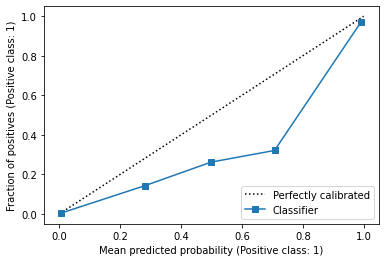

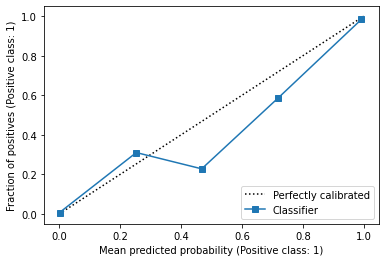

FOLD 1 | LogLoss: 0.0449
FOLD 1 | Calibrated LogLoss: 0.0523

Binning 0.093 GB of training data: 2.807 s
Binning 0.010 GB of validation data: 0.085 s
Fitting gradient boosted rounds:
[1/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.64842, val loss: 0.64862, in 0.065s
[2/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.60797, val loss: 0.60841, in 0.064s
[3/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.57113, val loss: 0.57186, in 0.069s
[4/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.53752, val loss: 0.53846, in 0.066s
[5/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.50667, val loss: 0.50781, in 0.063s
[6/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.47840, val loss: 0.47981, in 0.063s
[7/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.45235, val loss: 0.45402, in 0.063s
[8/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.42823, val loss: 0.43009, in 0.079s
[9/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.40592, val loss:

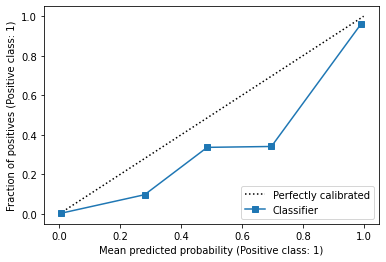

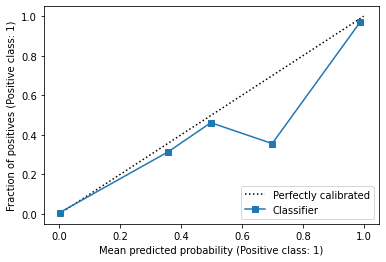

FOLD 2 | LogLoss: 0.0428
FOLD 2 | Calibrated LogLoss: 0.0543

Binning 0.093 GB of training data: 2.721 s
Binning 0.010 GB of validation data: 0.113 s
Fitting gradient boosted rounds:
[1/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.64835, val loss: 0.64874, in 0.066s
[2/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.60780, val loss: 0.60860, in 0.065s
[3/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.57094, val loss: 0.57211, in 0.071s
[4/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.53730, val loss: 0.53876, in 0.072s
[5/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.50646, val loss: 0.50834, in 0.075s
[6/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.47811, val loss: 0.48036, in 0.067s
[7/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.45200, val loss: 0.45457, in 0.073s
[8/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.42785, val loss: 0.43080, in 0.073s
[9/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.40550, val loss:

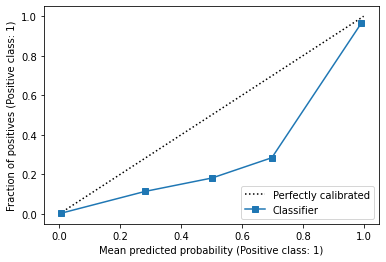

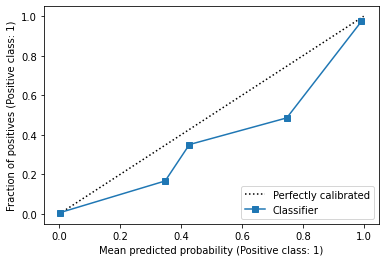

FOLD 3 | LogLoss: 0.0453
FOLD 3 | Calibrated LogLoss: 0.051

Binning 0.093 GB of training data: 2.870 s
Binning 0.010 GB of validation data: 0.073 s
Fitting gradient boosted rounds:
[1/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.64851, val loss: 0.64832, in 0.067s
[2/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.60810, val loss: 0.60779, in 0.066s
[3/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.57136, val loss: 0.57084, in 0.077s
[4/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.53783, val loss: 0.53720, in 0.070s
[5/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.50705, val loss: 0.50639, in 0.068s
[6/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.47882, val loss: 0.47810, in 0.069s
[7/5000] 1 tree, 31 leaves, max depth = 11, train loss: 0.45275, val loss: 0.45197, in 0.076s
[8/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.42867, val loss: 0.42781, in 0.065s
[9/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.40640, val loss:

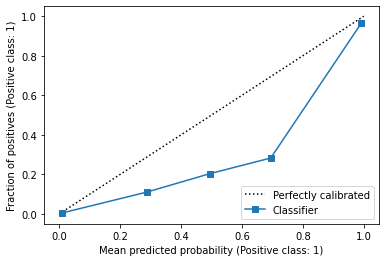

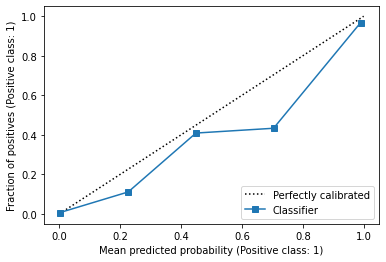

FOLD 4 | LogLoss: 0.044
FOLD 4 | Calibrated LogLoss: 0.0516

Binning 0.093 GB of training data: 5.743 s
Binning 0.010 GB of validation data: 0.081 s
Fitting gradient boosted rounds:
[1/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.64837, val loss: 0.64860, in 0.063s
[2/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.60783, val loss: 0.60829, in 0.067s
[3/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.57095, val loss: 0.57173, in 0.064s
[4/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.53732, val loss: 0.53843, in 0.068s
[5/5000] 1 tree, 31 leaves, max depth = 7, train loss: 0.50649, val loss: 0.50781, in 0.064s
[6/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.47818, val loss: 0.47971, in 0.067s
[7/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.45206, val loss: 0.45399, in 0.068s
[8/5000] 1 tree, 31 leaves, max depth = 9, train loss: 0.42799, val loss: 0.43023, in 0.069s
[9/5000] 1 tree, 31 leaves, max depth = 8, train loss: 0.40567, val loss: 

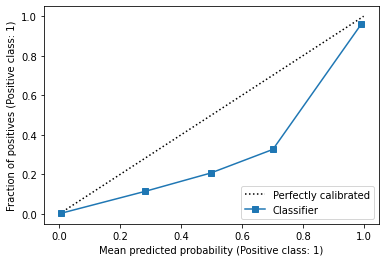

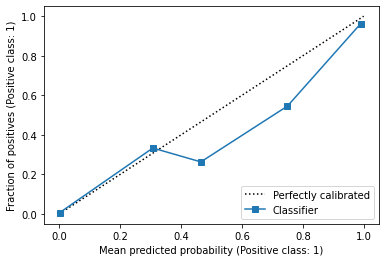

FOLD 5 | LogLoss: 0.0481
FOLD 5 | Calibrated LogLoss: 0.0553



In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    X_t, X_v = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = HistGradientBoostingClassifier(**HGB_param,random_state=42, loss="log_loss",max_iter=5_000,early_stopping=True,n_iter_no_change=250, verbose=1, class_weight="balanced")
    model.fit(X_t,y_t)

    folder_save=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/HGB_v2/CV_{fold}"
    os.chdir(folder_save)
    dump(model, 'hgbc.joblib')

    # initiate calibration:
    calibrator = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

    train_pred = model.predict_proba(X_t)[:,1]
    calibrator.fit(train_pred,y_t)

    valid_pred = model.predict_proba(X_v)[:,1]
    valid_pred_calib = calibrator.transform(valid_pred)

    valid_score = log_loss(y_v, valid_pred)
    valid_score_calib = log_loss(y_v, valid_pred_calib)

    predictions += model.predict_proba(X_test)[:,1] / FOLDS
    predictions_calib += calibrator.transform(model.predict_proba(X_test)[:,1]) / FOLDS

    disp = CalibrationDisplay.from_predictions(y_v, valid_pred)
    plt.show()

    disp = CalibrationDisplay.from_predictions(y_v, valid_pred_calib)
    plt.show()

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    print(f'FOLD {fold+1} | Calibrated LogLoss: {round(valid_score_calib, 4)}\n')

    scores.append(valid_score)
    scores_calib.append(valid_score_calib)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.045027
Final LogLoss Calibrated: 0.052883

Uncalibrated Scores: [0.04493104085029687, 0.04279884075471881, 0.04532666562735025, 0.04399915173392022, 0.04808019046601609]
Calibrated Scores: [0.05225746406238963, 0.054284964864008245, 0.05100531052152075, 0.051552252461527545, 0.05531657993334296]


In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.039733
Final LogLoss Calibrated: 0.054843

Uncalibrated Scores: [0.0420334141209706, 0.03749987641154986, 0.03967994271215465, 0.03820145672664128, 0.04124981373407677]
Calibrated Scores: [0.05438440120893934, 0.05048727169519977, 0.05030458274800167, 0.05925004633982163, 0.05979030108018914]


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])

In [ ]:
ss.Class=predictions
ss.to_csv("HGBClassifier_sub_v3_nocalib.csv")
ss.Class=predictions_calib
ss.to_csv("HGBClassifier_sub_v3_calib.csv")

## 5.8 XGBoost V2

In [ ]:
#define parameters
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)
#define parameters
predictions, scores = np.zeros(len(test_v0)), []

xgb_params = {
              'n_estimators': 5000,
              "max_depth": 3,
              "learning_rate": 0.13758648333409265,
              "min_child_weight": 8,
              "gamma": 0.011643317109940621,
              "subsample": 0.6447402312818076,
              "colsample_bytree": 0.527329284230269,
              "reg_alpha": 0.14151490274336978,
              "reg_lambda": 0.00031129696984688186,
              'n_jobs': -1,
              'objective': 'binary:logistic',
              'verbosity': 0,
              'eval_metric': 'logloss'
              }

In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    X_t, X_v = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    eval_set = [(X_v, y_v)]
    train_set = [(X_t, y_t)]

    model = XGBClassifier(**xgb_params)
    model.fit(X_t,y_t, early_stopping_rounds=250, eval_set=eval_set, verbose=True)

    valid_pred = model.predict_proba(X_v)[:,1]
    valid_score = log_loss(y_v, valid_pred)

    predictions += model.predict_proba(X_test)[:,1] / FOLDS
    os.chdir(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/XGBoost_v1/CV_{fold}")
    model.save_model('XGBoost_v0.txt')

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    scores.append(valid_score)

[0]	validation_0-logloss:0.57040
[1]	validation_0-logloss:0.47707
[2]	validation_0-logloss:0.40382
[3]	validation_0-logloss:0.34488
[4]	validation_0-logloss:0.29715
[5]	validation_0-logloss:0.25758
[6]	validation_0-logloss:0.22485
[7]	validation_0-logloss:0.19741
[8]	validation_0-logloss:0.17442
[9]	validation_0-logloss:0.15500
[10]	validation_0-logloss:0.13841
[11]	validation_0-logloss:0.12431
[12]	validation_0-logloss:0.11249
[13]	validation_0-logloss:0.10218
[14]	validation_0-logloss:0.09332
[15]	validation_0-logloss:0.08574
[16]	validation_0-logloss:0.07922
[17]	validation_0-logloss:0.07366
[18]	validation_0-logloss:0.06884
[19]	validation_0-logloss:0.06475
[20]	validation_0-logloss:0.06117
[21]	validation_0-logloss:0.05816
[22]	validation_0-logloss:0.05556
[23]	validation_0-logloss:0.05325
[24]	validation_0-logloss:0.05139
[25]	validation_0-logloss:0.04980
[26]	validation_0-logloss:0.04839
[27]	validation_0-logloss:0.04718
[28]	validation_0-logloss:0.04608
[29]	validation_0-loglos

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

Final LogLoss: 0.037138


[0.039502476649700906,
 0.03535538870855325,
 0.03732874658663476,
 0.035456832107890864,
 0.038046135510567784]

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

Final LogLoss: 0.037495


[0.03992737770586333,
 0.03566338027096722,
 0.0378118084037484,
 0.03624700475114399,
 0.03782480403132467]

In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])
ss.Class=predictions

In [ ]:
ss.to_csv("XGBClassifier_sub_v1.csv")

## 5.9 LGBMClassifier V2

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)
#define parameters
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

lgb_params = {
              'n_estimators': 5000,
              "max_depth": 4,
              "learning_rate": 0.1,
              "subsample": 0.25,
              "colsample_bytree": 0.50,
              "reg_alpha": 0.25,
              "reg_lambda": 0.1,
              'objective': 'binary',
              'metric': 'binary_logloss',
              'boosting_type': 'gbdt'
              }

lgb_params_0 = {'lambda_l1': 0.002351730102069405,
               'lambda_l2': 8.620764120953048,
               'bagging_freq': 4,
               'bagging_fraction': 0.5513100564762595,
               'feature_fraction': 0.7853392245368107,
               'verbosity': 5,
               'objective': 'binary',
               'learning_rate': 0.1,
               'reg_lambda': 1.0,
               'reg_alpha': 0.1,
               'max_depth': 6,
               'n_estimators': 10000,
               'colsample_bytree': 0.5,
               'min_child_samples': 10,
               'subsample_freq': 3,
               'subsample': 0.9,
               'importance_type': 'gain',
               'random_state': 71,
               'metric': 'binary_logloss',
               'num_leaves': 62}


FOLDS=5
seed = 42
np.random.seed(seed)

[1]	valid_0's binary_logloss: 0.255668
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.217586
[3]	valid_0's binary_logloss: 0.190616
[4]	valid_0's binary_logloss: 0.169571
[5]	valid_0's binary_logloss: 0.152627
[6]	valid_0's binary_logloss: 0.138483
[7]	valid_0's binary_logloss: 0.126384
[8]	valid_0's binary_logloss: 0.116068
[9]	valid_0's binary_logloss: 0.107242
[10]	valid_0's binary_logloss: 0.0994776
[11]	valid_0's binary_logloss: 0.0927899
[12]	valid_0's binary_logloss: 0.0867966
[13]	valid_0's binary_logloss: 0.0815031
[14]	valid_0's binary_logloss: 0.0768222
[15]	valid_0's binary_logloss: 0.0726762
[16]	valid_0's binary_logloss: 0.0690494
[17]	valid_0's binary_logloss: 0.0659049
[18]	valid_0's binary_logloss: 0.0630768
[19]	valid_0's binary_logloss: 0.0605438
[20]	valid_0's binary_logloss: 0.0582976
[21]	valid_0's binary_logloss: 0.0563005
[22]	valid_0's binary_logloss: 0.0545353
[23]	valid_0's binary_logloss: 0.052899
[24]	valid_0'

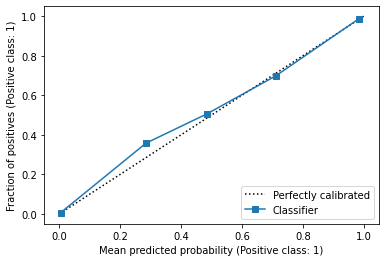

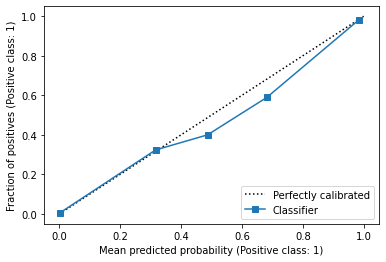

FOLD 1 | LogLoss: 0.0405
FOLD 1 | LogLoss: 0.0522
[1]	valid_0's binary_logloss: 0.25507
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.216573
[3]	valid_0's binary_logloss: 0.189196
[4]	valid_0's binary_logloss: 0.168068
[5]	valid_0's binary_logloss: 0.150914
[6]	valid_0's binary_logloss: 0.136558
[7]	valid_0's binary_logloss: 0.124468
[8]	valid_0's binary_logloss: 0.114101
[9]	valid_0's binary_logloss: 0.10516
[10]	valid_0's binary_logloss: 0.0972655
[11]	valid_0's binary_logloss: 0.0904337
[12]	valid_0's binary_logloss: 0.0844093
[13]	valid_0's binary_logloss: 0.0790801
[14]	valid_0's binary_logloss: 0.0743865
[15]	valid_0's binary_logloss: 0.0702349
[16]	valid_0's binary_logloss: 0.0665642
[17]	valid_0's binary_logloss: 0.0632708
[18]	valid_0's binary_logloss: 0.0603581
[19]	valid_0's binary_logloss: 0.0578102
[20]	valid_0's binary_logloss: 0.0555382
[21]	valid_0's binary_logloss: 0.0534219
[22]	valid_0's binary_logloss: 0.0515969
[23]	

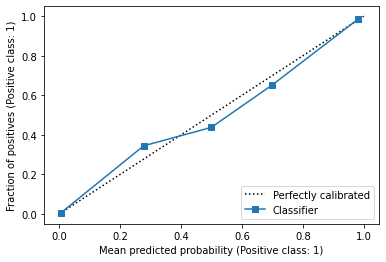

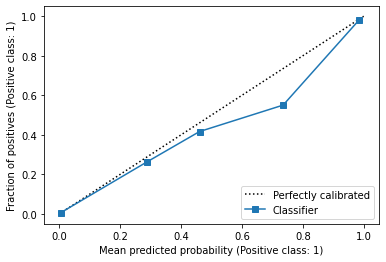

FOLD 2 | LogLoss: 0.0362
FOLD 2 | LogLoss: 0.0415
[1]	valid_0's binary_logloss: 0.255121
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.216577
[3]	valid_0's binary_logloss: 0.189363
[4]	valid_0's binary_logloss: 0.168243
[5]	valid_0's binary_logloss: 0.151146
[6]	valid_0's binary_logloss: 0.136888
[7]	valid_0's binary_logloss: 0.124845
[8]	valid_0's binary_logloss: 0.114581
[9]	valid_0's binary_logloss: 0.105613
[10]	valid_0's binary_logloss: 0.0977529
[11]	valid_0's binary_logloss: 0.0909389
[12]	valid_0's binary_logloss: 0.0849635
[13]	valid_0's binary_logloss: 0.0796779
[14]	valid_0's binary_logloss: 0.0750083
[15]	valid_0's binary_logloss: 0.0709017
[16]	valid_0's binary_logloss: 0.0672185
[17]	valid_0's binary_logloss: 0.0639694
[18]	valid_0's binary_logloss: 0.0610795
[19]	valid_0's binary_logloss: 0.0584975
[20]	valid_0's binary_logloss: 0.0561688
[21]	valid_0's binary_logloss: 0.054137
[22]	valid_0's binary_logloss: 0.0523396
[23]

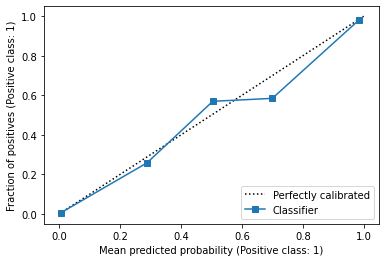

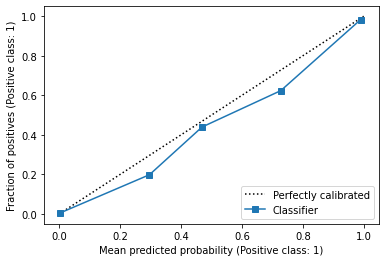

FOLD 3 | LogLoss: 0.0376
FOLD 3 | LogLoss: 0.0476
[1]	valid_0's binary_logloss: 0.254334
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.21573
[3]	valid_0's binary_logloss: 0.188384
[4]	valid_0's binary_logloss: 0.167234
[5]	valid_0's binary_logloss: 0.150149
[6]	valid_0's binary_logloss: 0.13594
[7]	valid_0's binary_logloss: 0.123906
[8]	valid_0's binary_logloss: 0.113614
[9]	valid_0's binary_logloss: 0.104727
[10]	valid_0's binary_logloss: 0.0968746
[11]	valid_0's binary_logloss: 0.0900509
[12]	valid_0's binary_logloss: 0.0840652
[13]	valid_0's binary_logloss: 0.0787942
[14]	valid_0's binary_logloss: 0.0741398
[15]	valid_0's binary_logloss: 0.0700187
[16]	valid_0's binary_logloss: 0.066314
[17]	valid_0's binary_logloss: 0.0630118
[18]	valid_0's binary_logloss: 0.0600796
[19]	valid_0's binary_logloss: 0.0575143
[20]	valid_0's binary_logloss: 0.0552508
[21]	valid_0's binary_logloss: 0.0532236
[22]	valid_0's binary_logloss: 0.0514432
[23]	v

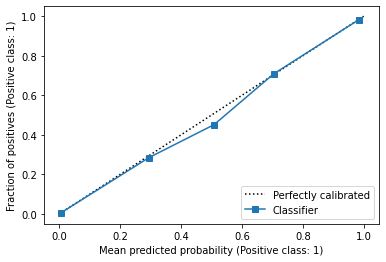

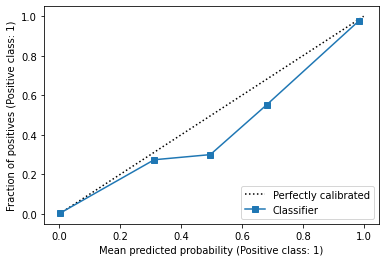

FOLD 4 | LogLoss: 0.0356
FOLD 4 | LogLoss: 0.0363
[1]	valid_0's binary_logloss: 0.255094
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.216549
[3]	valid_0's binary_logloss: 0.189195
[4]	valid_0's binary_logloss: 0.168084
[5]	valid_0's binary_logloss: 0.150958
[6]	valid_0's binary_logloss: 0.13672
[7]	valid_0's binary_logloss: 0.124665
[8]	valid_0's binary_logloss: 0.11441
[9]	valid_0's binary_logloss: 0.105628
[10]	valid_0's binary_logloss: 0.0979232
[11]	valid_0's binary_logloss: 0.0912222
[12]	valid_0's binary_logloss: 0.0852995
[13]	valid_0's binary_logloss: 0.0799905
[14]	valid_0's binary_logloss: 0.0753395
[15]	valid_0's binary_logloss: 0.0711896
[16]	valid_0's binary_logloss: 0.0675944
[17]	valid_0's binary_logloss: 0.0643748
[18]	valid_0's binary_logloss: 0.0615263
[19]	valid_0's binary_logloss: 0.0589708
[20]	valid_0's binary_logloss: 0.0566773
[21]	valid_0's binary_logloss: 0.0546032
[22]	valid_0's binary_logloss: 0.0527581
[23]	

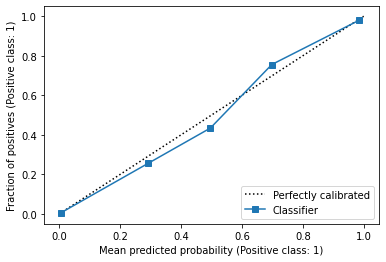

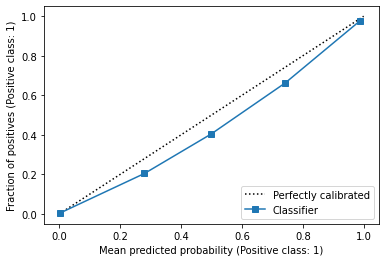

FOLD 5 | LogLoss: 0.0379
FOLD 5 | LogLoss: 0.0443


In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    X_t, X_v = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    eval_set = [(X_v, y_v)]
    train_set = [(X_t, y_t)]

    model = lgb.LGBMClassifier(**lgb_params_0)
    model.fit(X_t,y_t, early_stopping_rounds=250, eval_set=eval_set, verbose=True)

    # initiate calibration:
    calibrator = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

    train_pred = model.predict_proba(X_t)[:,1]
    calibrator.fit(train_pred,y_t)

    valid_pred = model.predict_proba(X_v)[:,1]
    valid_pred_calib = calibrator.transform(valid_pred)

    valid_score = log_loss(y_v, valid_pred)
    valid_score_calib = log_loss(y_v, valid_pred_calib)

    disp = CalibrationDisplay.from_predictions(y_v, valid_pred)
    plt.show()

    disp = CalibrationDisplay.from_predictions(y_v, valid_pred_calib)
    plt.show()

    predictions += model.predict_proba(X_test)[:,1] / FOLDS
    predictions_calib += calibrator.transform(model.predict_proba(X_test)[:,1]) / FOLDS

    os.chdir(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/LGBM_v2/CV_{fold}")
    model.booster_.save_model('lgb_reg_v1.txt', num_iteration=model.best_iteration_)

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    print(f'FOLD {fold+1} | LogLoss: {round(valid_score_calib, 4)}')

    scores.append(valid_score)
    scores_calib.append(valid_score_calib)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.037288
Final LogLoss Calibrated: 0.043861

Uncalibrated Scores: [0.04008660392802971, 0.03568491072447486, 0.037333220086525065, 0.035361814011408796, 0.037972374008538014]
Calibrated Scores: [0.04847133345310239, 0.04471475945938117, 0.04224590106517908, 0.036377575804963994, 0.047494207564626786]


In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
scores

Final LogLoss: 0.03714


[0.03964246350098972,
 0.03545033119509944,
 0.037144278499215415,
 0.035668767083452416,
 0.037796491644097284]

In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])

In [ ]:
ss.Class=predictions
ss.to_csv("lgbm_sub_v2_no_calib.csv")
ss.Class=predictions_calib
ss.to_csv("lgbm_sub_v2_calib.csv")

##5.10 Catboost V2

In [ ]:
#define parameters
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

config_v0={'learning_rate':0.01,
       'iterations':5000,
       'verbose':True,
        'early_stopping_rounds':250,
        'max_depth':6,
        'boosting_type': 'Ordered',
        'bootstrap_type': 'Bayesian',
        'bagging_temperature': 0.2,
       'loss_function':'Logloss',
       'eval_metric':'Logloss',
       'random_seed':4396,
       'use_best_model':True,
        'task_type':'GPU',
       }

config_v1 = {
            'iterations': 5000,
            'early_stopping_rounds':250,
            "depth": 3,
            "learning_rate": 0.08085612007223575,
            "l2_leaf_reg": 0.018480476349201046,
            "random_strength": 0.10466887211666757,
            "max_bin": 226,
            "one_hot_max_size": 92,
            "grow_policy": "Depthwise",
            "bootstrap_type": "Bayesian",
            "od_type": "Iter",
            'loss_function': 'Logloss',
            #'task_type': "GPU",
            'use_best_model':True,
        }

config_v4 =  {'colsample_bylevel': 0.9122807178002814,
             'eval_metric': 'Logloss',
              'iterations': 5000,
              'l2_leaf_reg': 0.8751327958077045,
             'learning_rate': 0.04519264945131604,
             'max_depth': 4
              }

FOLDS=5
seed = 42
np.random.seed(seed)

In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    train = cat.Pool(data=X_train.iloc[train_idx],label=y_train.iloc[train_idx])
    valid = cat.Pool(data=X_train.iloc[val_idx],label=y_train.iloc[val_idx])

    model = CatBoostClassifier(**config_v1)
    model.fit(train,eval_set=(valid),plot=False)

    # initiate calibration:
    calibrator = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

    train_pred = model.predict_proba(train)[:,1]
    calibrator.fit(train_pred,y_train.iloc[train_idx])

    valid_pred = model.predict_proba(valid)[:,1]
    valid_pred_calib = calibrator.transform(valid_pred)

    valid_score = log_loss(y_train.iloc[val_idx], valid_pred)
    valid_score_calib = log_loss(y_train.iloc[val_idx], valid_pred_calib)

    predictions += model.predict_proba(X_test)[:,1] / FOLDS
    predictions_calib += calibrator.transform(model.predict_proba(X_test)[:,1]) / FOLDS
    direc = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/catboost_v4/CV_{fold}"

    try:
        os.mkdir(direc)
    except OSError as error:
        print(f"{direc} already exists")

    os.chdir(direc)
    model.save_model('catboost_depth_7')

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    print(f'FOLD {fold+1} | LogLoss: {round(valid_score_calib, 4)}')

    scores.append(valid_score)
    scores_calib.append(valid_score_calib)

0:	learn: 0.5061610	test: 0.5062427	best: 0.5062427 (0)	total: 56.9ms	remaining: 4m 44s
1:	learn: 0.3774984	test: 0.3775927	best: 0.3775927 (1)	total: 109ms	remaining: 4m 33s
2:	learn: 0.2916457	test: 0.2920318	best: 0.2920318 (2)	total: 148ms	remaining: 4m 5s
3:	learn: 0.2295809	test: 0.2301562	best: 0.2301562 (3)	total: 185ms	remaining: 3m 50s
4:	learn: 0.1812473	test: 0.1819650	best: 0.1819650 (4)	total: 221ms	remaining: 3m 41s
5:	learn: 0.1495864	test: 0.1505211	best: 0.1505211 (5)	total: 261ms	remaining: 3m 37s
6:	learn: 0.1252812	test: 0.1263619	best: 0.1263619 (6)	total: 300ms	remaining: 3m 34s
7:	learn: 0.1060642	test: 0.1075138	best: 0.1075138 (7)	total: 339ms	remaining: 3m 31s
8:	learn: 0.0924110	test: 0.0940387	best: 0.0940387 (8)	total: 377ms	remaining: 3m 29s
9:	learn: 0.0818883	test: 0.0836102	best: 0.0836102 (9)	total: 415ms	remaining: 3m 26s
10:	learn: 0.0733976	test: 0.0752729	best: 0.0752729 (10)	total: 456ms	remaining: 3m 26s
11:	learn: 0.0671298	test: 0.0691511	best

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.037649
Final LogLoss Calibrated: 0.042729

Uncalibrated Scores: [0.0404275737413254, 0.0355914206744704, 0.0377409019484199, 0.0361048142215601, 0.03838224197483545]
Calibrated Scores: [0.04192486971466819, 0.03744323345113392, 0.04463568821971399, 0.0432909775454754, 0.046350199362232995]


In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')

Final LogLoss: 0.037836


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])

In [ ]:
ss.Class=predictions
ss.to_csv("Catboost_sub_v4_no_calib.csv")
ss.Class=predictions_calib
ss.to_csv("Catboost_sub_v4_calib.csv")

## 5.11 RandomForest

In [ ]:
#define parameters
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

FOLDS=5
seed = 42
np.random.seed(seed)

In [ ]:
X_subsampled, _, y_subsampled, _ = train_test_split(X_train, y_train, train_size=5_000, stratify=y_train ,random_state=42)
print(X_subsampled.shape,y_subsampled.shape)

#diamondX = subset_hyperpar_opt_df.drop(labels="price", axis=1)
#diamondY = subset_hyperpar_opt_df["price"]

(5000, 136) (5000,)


In [ ]:
os.chdir(folder_data)
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

reg = RandomForestClassifier(random_state=42, bootstrap=True, criterion="log_loss", class_weight="balanced")

param_grid = {
    'n_estimators': [250,500,750],
    'max_depth' : [4, 6, 8, 12, None],
    "max_features":[1,0.5,"sqrt","log2"]}

In [ ]:
CV_rfc = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5, scoring="neg_log_loss")
CV_rfc.fit(X_subsampled, y_subsampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='log_loss',
                                              random_state=42),
             param_grid={'max_depth': [4, 6, 8, 12, None],
                         'max_features': [1, 0.5, 'sqrt', 'log2'],
                         'n_estimators': [250, 500, 750]},
             scoring='neg_log_loss')

In [ ]:
rf_param = {'max_depth': 8, 'max_features': 1, 'n_estimators': 250}
#CV_rfc.best_params_

In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    X_t, X_v = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = RandomForestClassifier(**rf_param, random_state=42, bootstrap=True, criterion="log_loss", class_weight="balanced")
    model.fit(X_t,y_t)

    folder_save=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/RF_v0/CV_{fold}"
    os.chdir(folder_save)
    dump(model, 'rf_v0.joblib')

    # initiate calibration:
    calibrator = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

    train_pred = model.predict_proba(X_t)[:,1]
    calibrator.fit(train_pred,y_t)

    valid_pred = model.predict_proba(X_v)[:,1]
    valid_pred_calib = calibrator.transform(valid_pred)

    valid_score = log_loss(y_v, valid_pred)
    valid_score_calib = log_loss(y_v, valid_pred_calib)

    predictions += model.predict_proba(X_test)[:,1] / FOLDS
    predictions_calib += calibrator.transform(model.predict_proba(X_test)[:,1]) / FOLDS

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    print(f'FOLD {fold+1} | LogLoss: {round(valid_score_calib, 4)}\n')

    scores.append(valid_score)
    scores_calib.append(valid_score_calib)

FOLD 1 | LogLoss: 0.0691

FOLD 1 | LogLoss: 0.0555
FOLD 2 | LogLoss: 0.0688

FOLD 2 | LogLoss: 0.0488
FOLD 3 | LogLoss: 0.0713

FOLD 3 | LogLoss: 0.0469
FOLD 4 | LogLoss: 0.0704

FOLD 4 | LogLoss: 0.0461
FOLD 5 | LogLoss: 0.0712

FOLD 5 | LogLoss: 0.0509


In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.070136
Final LogLoss Calibrated: 0.049653

Uncalibrated Scores: [0.0690628937916888, 0.06878966875905733, 0.07126103394495031, 0.07041024071074166, 0.07115686180396419]
Calibrated Scores: [0.05552714464017817, 0.04877235007974998, 0.04690724628836898, 0.046138643004012235, 0.05091901537624043]


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])

In [ ]:
ss.Class=predictions
ss.to_csv("RF_sub_v0_nocalib.csv")
ss.Class=predictions_calib
ss.to_csv("RF_sub_v0_calib.csv")

## 5.12 ExtraTreesClassifier

In [ ]:
#define parameters
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

FOLDS=5
seed = 42
np.random.seed(seed)

In [ ]:
X_subsampled, _, y_subsampled, _ = train_test_split(X_train, y_train, train_size=5_000, stratify=y_train ,random_state=42)
print(X_subsampled.shape,y_subsampled.shape)

#diamondX = subset_hyperpar_opt_df.drop(labels="price", axis=1)
#diamondY = subset_hyperpar_opt_df["price"]

(5000, 136) (5000,)


In [ ]:
os.chdir(folder_data)
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

reg = ExtraTreesClassifier(random_state=42, bootstrap=True, criterion="log_loss", class_weight="balanced")

param_grid = {
    'n_estimators': [250,500,750],
    'max_depth' : [4, 6, 8, 12, None],
    "max_features":[1,0.5,"sqrt","log2"]}

In [ ]:
CV_rfc = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5, scoring="neg_log_loss")
CV_rfc.fit(X_subsampled, y_subsampled)

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(bootstrap=True,
                                            class_weight='balanced',
                                            criterion='log_loss',
                                            random_state=42),
             param_grid={'max_depth': [4, 6, 8, 12, None],
                         'max_features': [1, 0.5, 'sqrt', 'log2'],
                         'n_estimators': [250, 500, 750]},
             scoring='neg_log_loss')

In [ ]:
et_param = {'max_depth': 12, 'max_features': "sqrt", 'n_estimators': 750}
#CV_rfc.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 750}

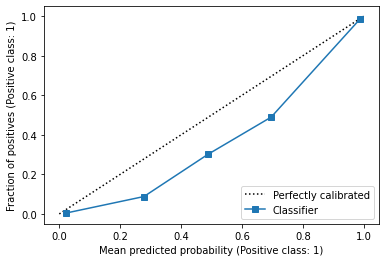

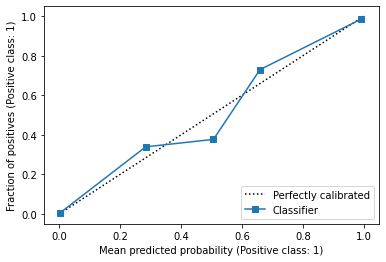

FOLD 1 | LogLoss: 0.0544
FOLD 1 | Calibrated LogLoss: 0.1073



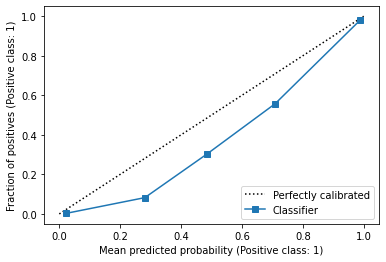

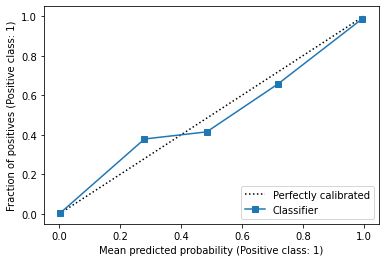

FOLD 2 | LogLoss: 0.054
FOLD 2 | Calibrated LogLoss: 0.0815



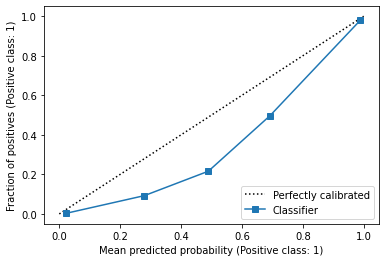

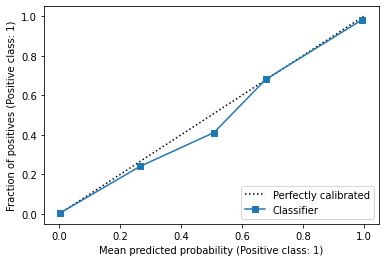

FOLD 3 | LogLoss: 0.0565
FOLD 3 | Calibrated LogLoss: 0.0961



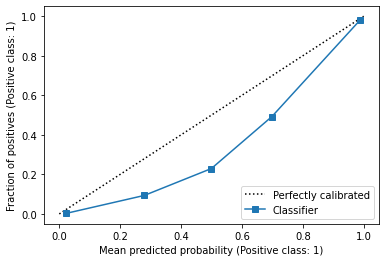

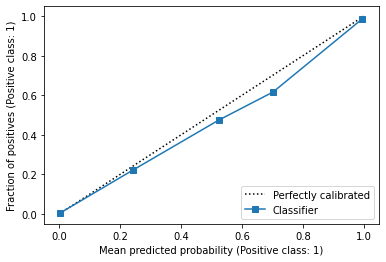

FOLD 4 | LogLoss: 0.0548
FOLD 4 | Calibrated LogLoss: 0.0807



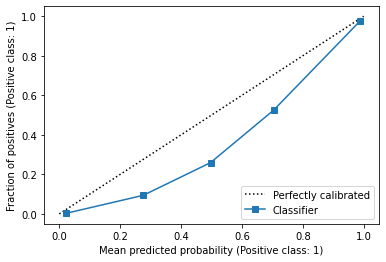

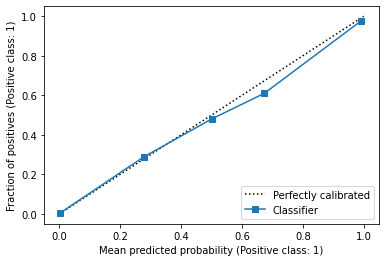

FOLD 5 | LogLoss: 0.0564
FOLD 5 | Calibrated LogLoss: 0.1078



In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    X_t, X_v = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = ExtraTreesClassifier(**et_param, random_state=42, bootstrap=True, criterion="log_loss", class_weight="balanced")
    model.fit(X_t,y_t)

    folder_save=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Pulsar/et_v0/CV_{fold}"
    os.chdir(folder_save)
    dump(model, 'et_v0.joblib')

    # initiate calibration:
    calibrator = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

    train_pred = model.predict_proba(X_t)[:,1]
    calibrator.fit(train_pred,y_t)

    valid_pred = model.predict_proba(X_v)[:,1]
    valid_pred_calib = calibrator.transform(valid_pred)

    valid_score = log_loss(y_v, valid_pred)
    valid_score_calib = log_loss(y_v, valid_pred_calib)

    predictions += model.predict_proba(X_test)[:,1] / FOLDS
    predictions_calib += calibrator.transform(model.predict_proba(X_test)[:,1]) / FOLDS

    disp = CalibrationDisplay.from_predictions(y_v, valid_pred)
    plt.show()

    disp = CalibrationDisplay.from_predictions(y_v, valid_pred_calib)
    plt.show()

    print(f'FOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
    print(f'FOLD {fold+1} | Calibrated LogLoss: {round(valid_score_calib, 4)}\n')

    scores.append(valid_score)
    scores_calib.append(valid_score_calib)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.055215
Final LogLoss Calibrated: 0.094694

Uncalibrated Scores: [0.05440656308734864, 0.053994583534844764, 0.056476718385563236, 0.05476039621924095, 0.05643891761741837]
Calibrated Scores: [0.10731889210468047, 0.08148723970390594, 0.09614182854375387, 0.08067516675005759, 0.10784532561132766]


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])

In [ ]:
ss.Class=predictions
ss.to_csv("et_sub_v0_nocalib.csv")
ss.Class=predictions_calib
ss.to_csv("et_sub_v0_calib.csv")

## 5.13 Direct Ensemble

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)
#define parameters
predictions, scores = np.zeros(len(test_v0)), []
predictions_calib, scores_calib = np.zeros(len(test_v0)), []

FOLDS=5
seed = 42
np.random.seed(seed)

In [ ]:
cbc_params = {
            'iterations':9999,
            'depth': 4,
            'learning_rate': 0.15687380686250746,
            'l2_leaf_reg': 4.0368544113430485,
            'random_strength': 0.1279482215776108,
            'max_bin': 238,
            'od_wait': 49,
            'one_hot_max_size': 39,
            'loss_function':'Logloss',
            'eval_metric':'Logloss',
            'grow_policy': 'SymmetricTree',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'random_state': 4228
        }

xgb_params = {
            'n_estimators':9999,
            'max_depth': 5,
            'learning_rate': 0.06333221939055333,
            'min_child_weight': 4,
            'gamma': 5.301218558776368e-08,
            'subsample': 0.41010429946197946,
            'colsample_bytree': 0.8298539920447499,
            'reg_alpha': 0.000517878113716743,
            'reg_lambda': 0.00030121415155097723,
            'n_jobs': -1,
            'objective': 'binary:logistic',
            'verbosity': 0,
            'eval_metric': 'logloss',
            'random_state': 4228}

lgbc_params = {
            'n_estimators': 9999,
            'max_depth': 6,
            'learning_rate': 0.05293702575527996,
            'subsample': 0.20851841295589477,
            'colsample_bytree': 0.5784778854092203,
            'reg_alpha': 0.30,
            'reg_lambda': 3.0e-08,
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'random_state': 4228
        }

[1]	valid_0's binary_logloss: 0.291699
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.261757
[3]	valid_0's binary_logloss: 0.239004
[4]	valid_0's binary_logloss: 0.220543
[5]	valid_0's binary_logloss: 0.204969
[6]	valid_0's binary_logloss: 0.191582
[7]	valid_0's binary_logloss: 0.179783
[8]	valid_0's binary_logloss: 0.169299
[9]	valid_0's binary_logloss: 0.159836
[10]	valid_0's binary_logloss: 0.151359
[11]	valid_0's binary_logloss: 0.143635
[12]	valid_0's binary_logloss: 0.13651
[13]	valid_0's binary_logloss: 0.13
[14]	valid_0's binary_logloss: 0.123999
[15]	valid_0's binary_logloss: 0.118484
[16]	valid_0's binary_logloss: 0.113366
[17]	valid_0's binary_logloss: 0.108644
[18]	valid_0's binary_logloss: 0.104237
[19]	valid_0's binary_logloss: 0.10013
[20]	valid_0's binary_logloss: 0.0963338
[21]	valid_0's binary_logloss: 0.0927891
[22]	valid_0's binary_logloss: 0.0894705
[23]	valid_0's binary_logloss: 0.0863775
[24]	valid_0's binary_loglos

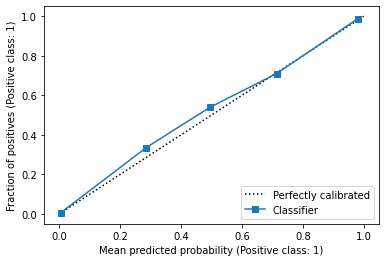

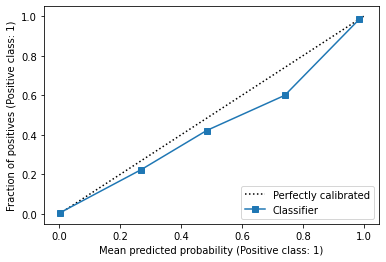


FOLD 1 | LogLoss: 0.04
FOLD 1 | Calibrated LogLoss: 0.0568

[0]	validation_0-logloss:0.63416
[1]	validation_0-logloss:0.58225
[2]	validation_0-logloss:0.53613
[3]	validation_0-logloss:0.49485
[4]	validation_0-logloss:0.45790
[5]	validation_0-logloss:0.42444
[6]	validation_0-logloss:0.39423
[7]	validation_0-logloss:0.36681
[8]	validation_0-logloss:0.34181
[9]	validation_0-logloss:0.31900
[10]	validation_0-logloss:0.29810
[11]	validation_0-logloss:0.27893
[12]	validation_0-logloss:0.26142
[13]	validation_0-logloss:0.24535
[14]	validation_0-logloss:0.23046
[15]	validation_0-logloss:0.21678
[16]	validation_0-logloss:0.20408
[17]	validation_0-logloss:0.19239
[18]	validation_0-logloss:0.18157
[19]	validation_0-logloss:0.17157
[20]	validation_0-logloss:0.16228
[21]	validation_0-logloss:0.15374
[22]	validation_0-logloss:0.14573
[23]	validation_0-logloss:0.13829
[24]	validation_0-logloss:0.13137
[25]	validation_0-logloss:0.12496
[26]	validation_0-logloss:0.11898
[27]	validation_0-logloss:0.113

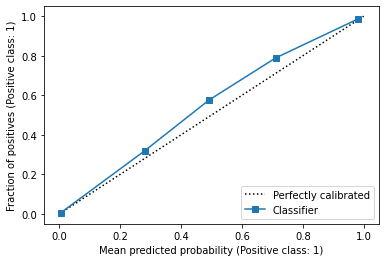

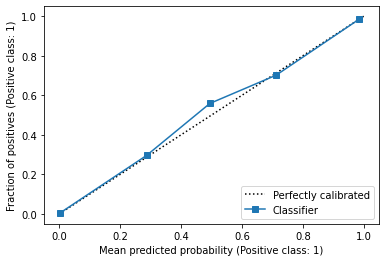


FOLD 1 | LogLoss: 0.0395
FOLD 1 | Calibrated LogLoss: 0.042

0:	learn: 0.3647795	test: 0.3647100	best: 0.3647100 (0)	total: 55.8ms	remaining: 9m 18s
1:	learn: 0.2171738	test: 0.2173849	best: 0.2173849 (1)	total: 124ms	remaining: 10m 22s
2:	learn: 0.1428301	test: 0.1434104	best: 0.1434104 (2)	total: 180ms	remaining: 10m 1s
3:	learn: 0.0992694	test: 0.1002629	best: 0.1002629 (3)	total: 240ms	remaining: 9m 59s
4:	learn: 0.0789477	test: 0.0804353	best: 0.0804353 (4)	total: 308ms	remaining: 10m 15s
5:	learn: 0.0665274	test: 0.0681857	best: 0.0681857 (5)	total: 362ms	remaining: 10m 3s
6:	learn: 0.0574190	test: 0.0593523	best: 0.0593523 (6)	total: 418ms	remaining: 9m 56s
7:	learn: 0.0518238	test: 0.0539294	best: 0.0539294 (7)	total: 480ms	remaining: 9m 58s
8:	learn: 0.0495180	test: 0.0517538	best: 0.0517538 (8)	total: 544ms	remaining: 10m 4s
9:	learn: 0.0473714	test: 0.0497052	best: 0.0497052 (9)	total: 601ms	remaining: 10m
10:	learn: 0.0445849	test: 0.0471243	best: 0.0471243 (10)	total: 659

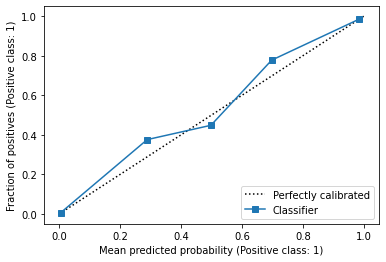

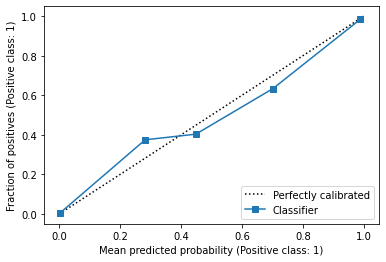


FOLD 1 | LogLoss: 0.04
FOLD 1 | Calibrated LogLoss: 0.0419

[1]	valid_0's binary_logloss: 0.291282
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.261093
[3]	valid_0's binary_logloss: 0.238136
[4]	valid_0's binary_logloss: 0.219468
[5]	valid_0's binary_logloss: 0.203771
[6]	valid_0's binary_logloss: 0.190338
[7]	valid_0's binary_logloss: 0.178434
[8]	valid_0's binary_logloss: 0.167868
[9]	valid_0's binary_logloss: 0.158375
[10]	valid_0's binary_logloss: 0.149843
[11]	valid_0's binary_logloss: 0.142022
[12]	valid_0's binary_logloss: 0.134808
[13]	valid_0's binary_logloss: 0.128222
[14]	valid_0's binary_logloss: 0.122203
[15]	valid_0's binary_logloss: 0.116635
[16]	valid_0's binary_logloss: 0.11144
[17]	valid_0's binary_logloss: 0.106632
[18]	valid_0's binary_logloss: 0.102178
[19]	valid_0's binary_logloss: 0.09804
[20]	valid_0's binary_logloss: 0.0942099
[21]	valid_0's binary_logloss: 0.0906487
[22]	valid_0's binary_logloss: 0.0873185
[23]

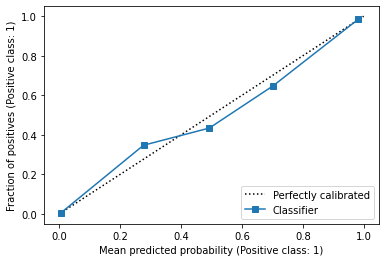

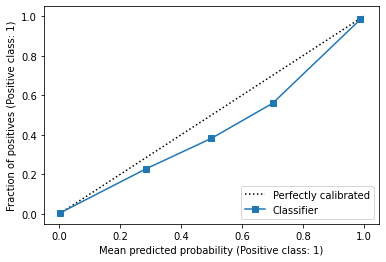


FOLD 2 | LogLoss: 0.0359
FOLD 2 | Calibrated LogLoss: 0.0558

[0]	validation_0-logloss:0.63417
[1]	validation_0-logloss:0.58220
[2]	validation_0-logloss:0.53603
[3]	validation_0-logloss:0.49473
[4]	validation_0-logloss:0.45774
[5]	validation_0-logloss:0.42433
[6]	validation_0-logloss:0.39408
[7]	validation_0-logloss:0.36664
[8]	validation_0-logloss:0.34159
[9]	validation_0-logloss:0.31874
[10]	validation_0-logloss:0.29785
[11]	validation_0-logloss:0.27866
[12]	validation_0-logloss:0.26108
[13]	validation_0-logloss:0.24492
[14]	validation_0-logloss:0.23003
[15]	validation_0-logloss:0.21623
[16]	validation_0-logloss:0.20356
[17]	validation_0-logloss:0.19184
[18]	validation_0-logloss:0.18100
[19]	validation_0-logloss:0.17096
[20]	validation_0-logloss:0.16162
[21]	validation_0-logloss:0.15299
[22]	validation_0-logloss:0.14494
[23]	validation_0-logloss:0.13745
[24]	validation_0-logloss:0.13056
[25]	validation_0-logloss:0.12415
[26]	validation_0-logloss:0.11813
[27]	validation_0-logloss:0.1

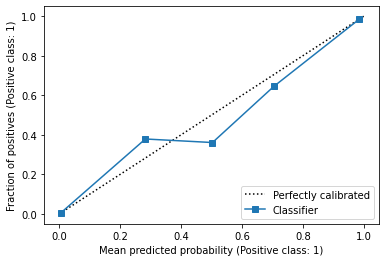

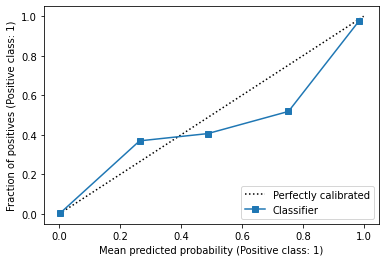


FOLD 2 | LogLoss: 0.0355
FOLD 2 | Calibrated LogLoss: 0.0388

0:	learn: 0.3671248	test: 0.3676021	best: 0.3676021 (0)	total: 58.8ms	remaining: 9m 47s
1:	learn: 0.2190292	test: 0.2193585	best: 0.2193585 (1)	total: 115ms	remaining: 9m 34s
2:	learn: 0.1404337	test: 0.1406621	best: 0.1406621 (2)	total: 174ms	remaining: 9m 39s
3:	learn: 0.1013014	test: 0.1013430	best: 0.1013430 (3)	total: 242ms	remaining: 10m 4s
4:	learn: 0.0786706	test: 0.0785725	best: 0.0785725 (4)	total: 308ms	remaining: 10m 15s
5:	learn: 0.0662673	test: 0.0660650	best: 0.0660650 (5)	total: 364ms	remaining: 10m 5s
6:	learn: 0.0579120	test: 0.0576038	best: 0.0576038 (6)	total: 425ms	remaining: 10m 6s
7:	learn: 0.0533909	test: 0.0530387	best: 0.0530387 (7)	total: 479ms	remaining: 9m 58s
8:	learn: 0.0498542	test: 0.0495077	best: 0.0495077 (8)	total: 552ms	remaining: 10m 13s
9:	learn: 0.0466376	test: 0.0461823	best: 0.0461823 (9)	total: 611ms	remaining: 10m 10s
10:	learn: 0.0443597	test: 0.0437916	best: 0.0437916 (10)	total

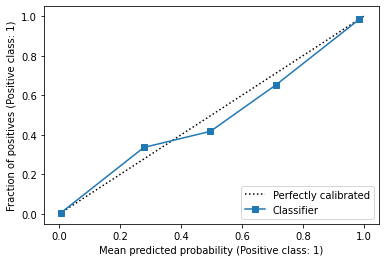

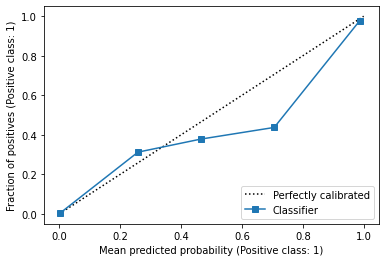


FOLD 2 | LogLoss: 0.0357
FOLD 2 | Calibrated LogLoss: 0.0381

[1]	valid_0's binary_logloss: 0.291283
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.261158
[3]	valid_0's binary_logloss: 0.238266
[4]	valid_0's binary_logloss: 0.219642
[5]	valid_0's binary_logloss: 0.203941
[6]	valid_0's binary_logloss: 0.190525
[7]	valid_0's binary_logloss: 0.178687
[8]	valid_0's binary_logloss: 0.168195
[9]	valid_0's binary_logloss: 0.158723
[10]	valid_0's binary_logloss: 0.150236
[11]	valid_0's binary_logloss: 0.14249
[12]	valid_0's binary_logloss: 0.135365
[13]	valid_0's binary_logloss: 0.128886
[14]	valid_0's binary_logloss: 0.122905
[15]	valid_0's binary_logloss: 0.11736
[16]	valid_0's binary_logloss: 0.112209
[17]	valid_0's binary_logloss: 0.107444
[18]	valid_0's binary_logloss: 0.103005
[19]	valid_0's binary_logloss: 0.0988869
[20]	valid_0's binary_logloss: 0.0950692
[21]	valid_0's binary_logloss: 0.0915224
[22]	valid_0's binary_logloss: 0.088198
[2

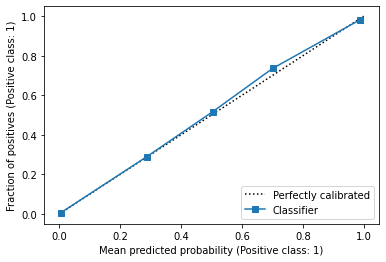

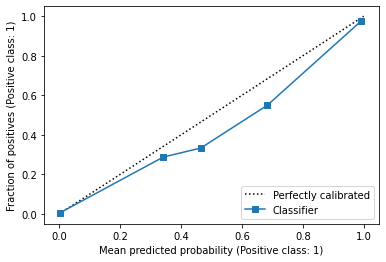


FOLD 3 | LogLoss: 0.0372
FOLD 3 | Calibrated LogLoss: 0.1248

[0]	validation_0-logloss:0.63425
[1]	validation_0-logloss:0.58232
[2]	validation_0-logloss:0.53611
[3]	validation_0-logloss:0.49492
[4]	validation_0-logloss:0.45801
[5]	validation_0-logloss:0.42461
[6]	validation_0-logloss:0.39436
[7]	validation_0-logloss:0.36699
[8]	validation_0-logloss:0.34200
[9]	validation_0-logloss:0.31923
[10]	validation_0-logloss:0.29845
[11]	validation_0-logloss:0.27934
[12]	validation_0-logloss:0.26179
[13]	validation_0-logloss:0.24566
[14]	validation_0-logloss:0.23075
[15]	validation_0-logloss:0.21701
[16]	validation_0-logloss:0.20432
[17]	validation_0-logloss:0.19261
[18]	validation_0-logloss:0.18181
[19]	validation_0-logloss:0.17179
[20]	validation_0-logloss:0.16244
[21]	validation_0-logloss:0.15384
[22]	validation_0-logloss:0.14586
[23]	validation_0-logloss:0.13840
[24]	validation_0-logloss:0.13151
[25]	validation_0-logloss:0.12511
[26]	validation_0-logloss:0.11919
[27]	validation_0-logloss:0.1

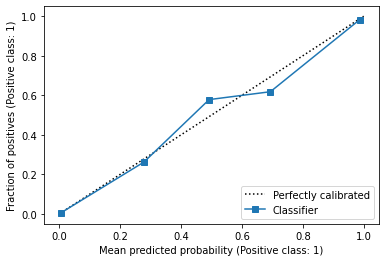

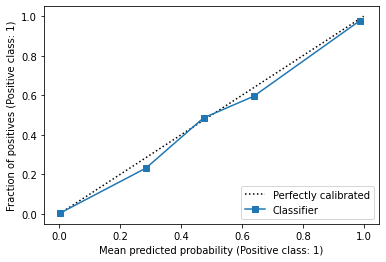


FOLD 3 | LogLoss: 0.0372
FOLD 3 | Calibrated LogLoss: 0.0401

0:	learn: 0.3531135	test: 0.3535911	best: 0.3535911 (0)	total: 56.2ms	remaining: 9m 21s
1:	learn: 0.1935880	test: 0.1944734	best: 0.1944734 (1)	total: 121ms	remaining: 10m 7s
2:	learn: 0.1245352	test: 0.1257227	best: 0.1257227 (2)	total: 185ms	remaining: 10m 16s
3:	learn: 0.0907275	test: 0.0921619	best: 0.0921619 (3)	total: 244ms	remaining: 10m 9s
4:	learn: 0.0717837	test: 0.0732311	best: 0.0732311 (4)	total: 318ms	remaining: 10m 35s
5:	learn: 0.0596039	test: 0.0610697	best: 0.0610697 (5)	total: 378ms	remaining: 10m 29s
6:	learn: 0.0527453	test: 0.0542362	best: 0.0542362 (6)	total: 443ms	remaining: 10m 32s
7:	learn: 0.0486588	test: 0.0502461	best: 0.0502461 (7)	total: 502ms	remaining: 10m 27s
8:	learn: 0.0462939	test: 0.0479600	best: 0.0479600 (8)	total: 589ms	remaining: 10m 53s
9:	learn: 0.0442184	test: 0.0458731	best: 0.0458731 (9)	total: 654ms	remaining: 10m 53s
10:	learn: 0.0430622	test: 0.0448303	best: 0.0448303 (10)	t

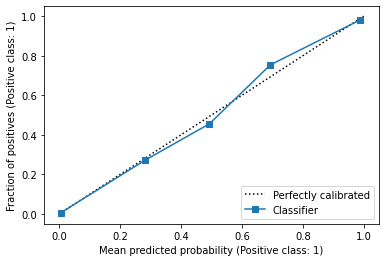

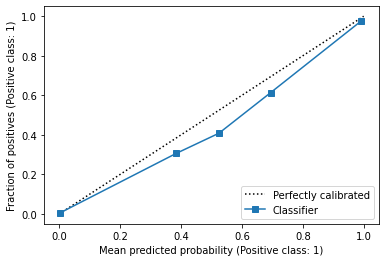


FOLD 3 | LogLoss: 0.0377
FOLD 3 | Calibrated LogLoss: 0.0443

[1]	valid_0's binary_logloss: 0.291207
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.26094
[3]	valid_0's binary_logloss: 0.237912
[4]	valid_0's binary_logloss: 0.219265
[5]	valid_0's binary_logloss: 0.20353
[6]	valid_0's binary_logloss: 0.190016
[7]	valid_0's binary_logloss: 0.178172
[8]	valid_0's binary_logloss: 0.167609
[9]	valid_0's binary_logloss: 0.158082
[10]	valid_0's binary_logloss: 0.149541
[11]	valid_0's binary_logloss: 0.141738
[12]	valid_0's binary_logloss: 0.134536
[13]	valid_0's binary_logloss: 0.127958
[14]	valid_0's binary_logloss: 0.121942
[15]	valid_0's binary_logloss: 0.116344
[16]	valid_0's binary_logloss: 0.111158
[17]	valid_0's binary_logloss: 0.106364
[18]	valid_0's binary_logloss: 0.101918
[19]	valid_0's binary_logloss: 0.0977977
[20]	valid_0's binary_logloss: 0.0939337
[21]	valid_0's binary_logloss: 0.090343
[22]	valid_0's binary_logloss: 0.0869936
[2

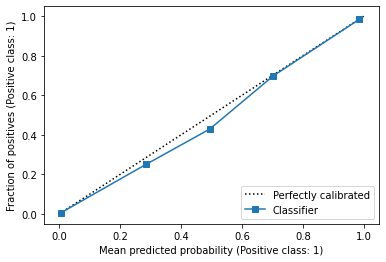

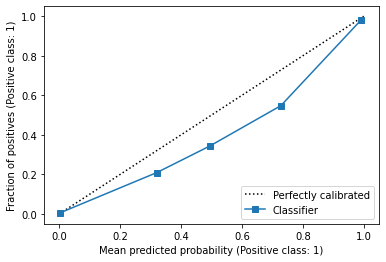


FOLD 4 | LogLoss: 0.0353
FOLD 4 | Calibrated LogLoss: 0.0704

[0]	validation_0-logloss:0.63413
[1]	validation_0-logloss:0.58211
[2]	validation_0-logloss:0.53590
[3]	validation_0-logloss:0.49461
[4]	validation_0-logloss:0.45761
[5]	validation_0-logloss:0.42416
[6]	validation_0-logloss:0.39392
[7]	validation_0-logloss:0.36648
[8]	validation_0-logloss:0.34151
[9]	validation_0-logloss:0.31872
[10]	validation_0-logloss:0.29786
[11]	validation_0-logloss:0.27863
[12]	validation_0-logloss:0.26099
[13]	validation_0-logloss:0.24481
[14]	validation_0-logloss:0.22992
[15]	validation_0-logloss:0.21619
[16]	validation_0-logloss:0.20347
[17]	validation_0-logloss:0.19177
[18]	validation_0-logloss:0.18089
[19]	validation_0-logloss:0.17089
[20]	validation_0-logloss:0.16157
[21]	validation_0-logloss:0.15292
[22]	validation_0-logloss:0.14485
[23]	validation_0-logloss:0.13742
[24]	validation_0-logloss:0.13048
[25]	validation_0-logloss:0.12403
[26]	validation_0-logloss:0.11806
[27]	validation_0-logloss:0.1

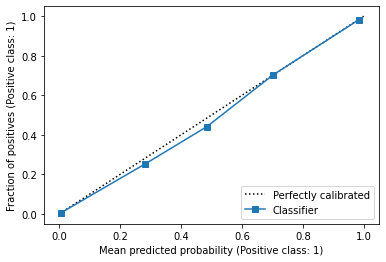

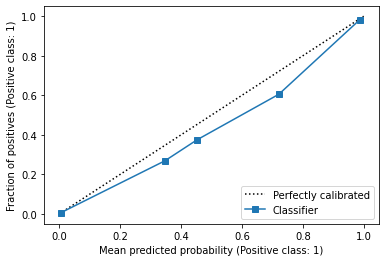


FOLD 4 | LogLoss: 0.0358
FOLD 4 | Calibrated LogLoss: 0.0379

0:	learn: 0.3728588	test: 0.3727739	best: 0.3727739 (0)	total: 52.6ms	remaining: 8m 46s
1:	learn: 0.2238223	test: 0.2235661	best: 0.2235661 (1)	total: 103ms	remaining: 8m 32s
2:	learn: 0.1414563	test: 0.1412537	best: 0.1412537 (2)	total: 155ms	remaining: 8m 37s
3:	learn: 0.1041232	test: 0.1037411	best: 0.1037411 (3)	total: 205ms	remaining: 8m 33s
4:	learn: 0.0825213	test: 0.0819456	best: 0.0819456 (4)	total: 263ms	remaining: 8m 45s
5:	learn: 0.0666039	test: 0.0660346	best: 0.0660346 (5)	total: 322ms	remaining: 8m 56s
6:	learn: 0.0592991	test: 0.0586305	best: 0.0586305 (6)	total: 372ms	remaining: 8m 50s
7:	learn: 0.0537209	test: 0.0530014	best: 0.0530014 (7)	total: 429ms	remaining: 8m 56s
8:	learn: 0.0486879	test: 0.0478915	best: 0.0478915 (8)	total: 502ms	remaining: 9m 17s
9:	learn: 0.0462043	test: 0.0454264	best: 0.0454264 (9)	total: 564ms	remaining: 9m 23s
10:	learn: 0.0451514	test: 0.0444719	best: 0.0444719 (10)	total: 6

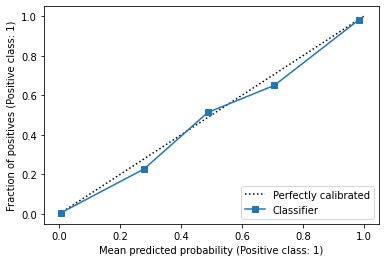

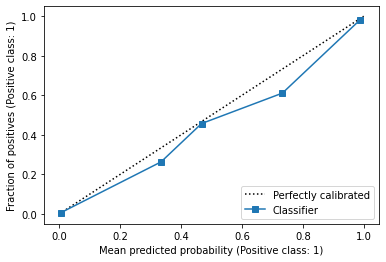


FOLD 4 | LogLoss: 0.0359
FOLD 4 | Calibrated LogLoss: 0.0365

[1]	valid_0's binary_logloss: 0.291498
Training until validation scores don't improve for 250 rounds.
[2]	valid_0's binary_logloss: 0.261367
[3]	valid_0's binary_logloss: 0.238432
[4]	valid_0's binary_logloss: 0.219853
[5]	valid_0's binary_logloss: 0.204136
[6]	valid_0's binary_logloss: 0.190716
[7]	valid_0's binary_logloss: 0.178847
[8]	valid_0's binary_logloss: 0.168367
[9]	valid_0's binary_logloss: 0.158848
[10]	valid_0's binary_logloss: 0.150333
[11]	valid_0's binary_logloss: 0.142596
[12]	valid_0's binary_logloss: 0.135477
[13]	valid_0's binary_logloss: 0.128988
[14]	valid_0's binary_logloss: 0.12298
[15]	valid_0's binary_logloss: 0.117385
[16]	valid_0's binary_logloss: 0.112213
[17]	valid_0's binary_logloss: 0.107454
[18]	valid_0's binary_logloss: 0.103045
[19]	valid_0's binary_logloss: 0.0989418
[20]	valid_0's binary_logloss: 0.0951365
[21]	valid_0's binary_logloss: 0.0915712
[22]	valid_0's binary_logloss: 0.0882871


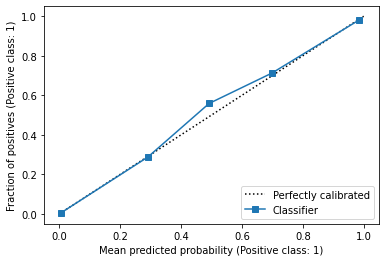

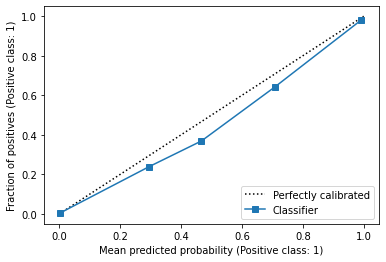


FOLD 5 | LogLoss: 0.0387
FOLD 5 | Calibrated LogLoss: 0.0541

[0]	validation_0-logloss:0.63409
[1]	validation_0-logloss:0.58218
[2]	validation_0-logloss:0.53598
[3]	validation_0-logloss:0.49478
[4]	validation_0-logloss:0.45775
[5]	validation_0-logloss:0.42431
[6]	validation_0-logloss:0.39411
[7]	validation_0-logloss:0.36673
[8]	validation_0-logloss:0.34183
[9]	validation_0-logloss:0.31899
[10]	validation_0-logloss:0.29811
[11]	validation_0-logloss:0.27898
[12]	validation_0-logloss:0.26142
[13]	validation_0-logloss:0.24531
[14]	validation_0-logloss:0.23041
[15]	validation_0-logloss:0.21668
[16]	validation_0-logloss:0.20399
[17]	validation_0-logloss:0.19230
[18]	validation_0-logloss:0.18150
[19]	validation_0-logloss:0.17146
[20]	validation_0-logloss:0.16218
[21]	validation_0-logloss:0.15354
[22]	validation_0-logloss:0.14550
[23]	validation_0-logloss:0.13807
[24]	validation_0-logloss:0.13117
[25]	validation_0-logloss:0.12475
[26]	validation_0-logloss:0.11882
[27]	validation_0-logloss:0.1

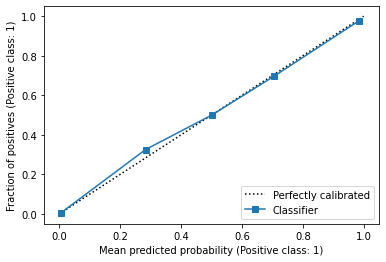

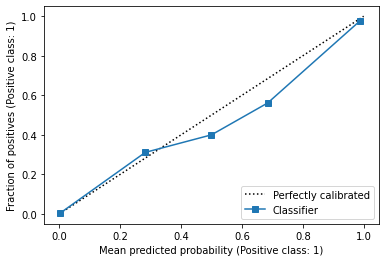


FOLD 5 | LogLoss: 0.0377
FOLD 5 | Calibrated LogLoss: 0.0406

0:	learn: 0.3612913	test: 0.3617408	best: 0.3617408 (0)	total: 56.7ms	remaining: 9m 26s
1:	learn: 0.2181231	test: 0.2187984	best: 0.2187984 (1)	total: 108ms	remaining: 9m 1s
2:	learn: 0.1455081	test: 0.1465395	best: 0.1465395 (2)	total: 159ms	remaining: 8m 49s
3:	learn: 0.1047344	test: 0.1058025	best: 0.1058025 (3)	total: 215ms	remaining: 8m 57s
4:	learn: 0.0780984	test: 0.0793272	best: 0.0793272 (4)	total: 284ms	remaining: 9m 27s
5:	learn: 0.0649079	test: 0.0664160	best: 0.0664160 (5)	total: 338ms	remaining: 9m 22s
6:	learn: 0.0565648	test: 0.0580746	best: 0.0580746 (6)	total: 395ms	remaining: 9m 23s
7:	learn: 0.0519844	test: 0.0535257	best: 0.0535257 (7)	total: 445ms	remaining: 9m 15s
8:	learn: 0.0488900	test: 0.0505205	best: 0.0505205 (8)	total: 516ms	remaining: 9m 32s
9:	learn: 0.0458796	test: 0.0476358	best: 0.0476358 (9)	total: 573ms	remaining: 9m 32s
10:	learn: 0.0443689	test: 0.0462585	best: 0.0462585 (10)	total: 65

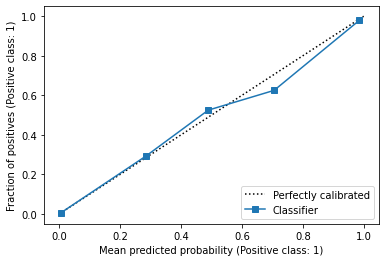

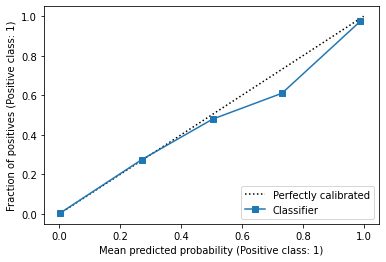


FOLD 5 | LogLoss: 0.0385
FOLD 5 | Calibrated LogLoss: 0.0447



In [ ]:
#k-fold
k = StratifiedKFold(n_splits=FOLDS, random_state=seed, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(X_train, y_train)):

    X_t, X_v = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    eval_set = [(X_v, y_v)]
    train_set = [(X_t, y_t)]

    models = [lgb.LGBMClassifier(**lgbc_params),XGBClassifier(**xgb_params),CatBoostClassifier(**cbc_params)]

    for model in models:
      model.fit(X_t,y_t, early_stopping_rounds=250, eval_set=eval_set, verbose=True)

      # initiate calibration:
      calibrator = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

      train_pred = model.predict_proba(X_t)[:,1]
      calibrator.fit(train_pred,y_t)

      valid_pred = model.predict_proba(X_v)[:,1]
      valid_pred_calib = calibrator.transform(valid_pred)

      valid_score = log_loss(y_v, valid_pred)
      valid_score_calib = log_loss(y_v, valid_pred_calib)

      disp = CalibrationDisplay.from_predictions(y_v, valid_pred)
      plt.show()

      disp = CalibrationDisplay.from_predictions(y_v, valid_pred_calib)
      plt.show()

      predictions += model.predict_proba(X_test)[:,1] / (FOLDS*3)
      predictions_calib += calibrator.transform(model.predict_proba(X_test)[:,1]) / (FOLDS*3)

      print(f'\nFOLD {fold+1} | LogLoss: {round(valid_score, 4)}')
      print(f'FOLD {fold+1} | Calibrated LogLoss: {round(valid_score_calib, 4)}\n')

      scores.append(valid_score)
      scores_calib.append(valid_score_calib)

In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.037375
Final LogLoss Calibrated: 0.051113

Uncalibrated Scores: [0.03996304400203131, 0.03948398025948622, 0.04002077830251817, 0.035912204488290314, 0.03550355315453678, 0.03573001183218991, 0.03717566762026292, 0.03718055650588321, 0.03773338341487786, 0.03529718538804711, 0.035780095340975364, 0.03590037668150515, 0.03869952432510099, 0.03770166748411088, 0.03853994037581674]
Calibrated Scores: [0.056779304367892865, 0.04199498677415932, 0.04194591774000809, 0.055757124455898165, 0.03877983349626397, 0.03812942568863117, 0.1248299109133607, 0.04006552558992335, 0.04431403088268132, 0.07035923668552885, 0.03786369070189976, 0.036484685556618185, 0.05412448337081698, 0.04061688447867225, 0.04465675269274057]


In [ ]:
print(f'Final LogLoss: {round(np.mean(scores), 6)}')
print(f'Final LogLoss Calibrated: {round(np.mean(scores_calib), 6)}')
print(f"\nUncalibrated Scores: {scores}\nCalibrated Scores: {scores_calib}")

Final LogLoss: 0.037375
Final LogLoss Calibrated: 0.051113

Uncalibrated Scores: [0.03996304400203131, 0.03948398025948622, 0.04002077830251817, 0.035912204488290314, 0.03550355315453678, 0.03573001183218991, 0.03717566762026292, 0.03718055650588321, 0.03773338341487786, 0.03529718538804711, 0.035780095340975364, 0.03590037668150515, 0.03869952432510099, 0.03770166748411088, 0.03853994037581674]
Calibrated Scores: [0.056779304367892865, 0.04199498677415932, 0.04194591774000809, 0.055757124455898165, 0.03877983349626397, 0.03812942568863117, 0.1248299109133607, 0.04006552558992335, 0.04431403088268132, 0.07035923668552885, 0.03786369070189976, 0.036484685556618185, 0.05412448337081698, 0.04061688447867225, 0.04465675269274057]


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])

In [ ]:
ss.Class=predictions
ss.to_csv("dir_ens_v1_nocalib.csv")
ss.Class=predictions_calib
ss.to_csv("dir_ens_v1_calib.csv")

## 6.0 Performance on Test Set  

In [ ]:
results_dataframe = pd.DataFrame(index=X_test.index)

for i in tqdm(range(5)):

  star_model = tf.keras.models.load_model(folders_nn+f'model_tabnet_v0/CV_{i}')

  y_pred = star_model(X_test)

  results_dataframe[i] = y_pred

100%|██████████| 5/5 [01:24<00:00, 16.91s/it]


In [ ]:
results_dataframe

,0,1,2,3,4
0,0.003190,0.001065,0.006505,0.002065,0.002235
1,0.008503,0.007214,0.009679,0.012250,0.007871
2,0.001017,0.000178,0.000250,0.001067,0.000742
3,0.350340,0.301037,0.576434,0.452229,0.316011
4,0.023287,0.032775,0.036427,0.017865,0.038835
...,...,...,...,...,...
78372,0.004028,0.001912,0.003828,0.003063,0.010771
78373,0.000953,0.000207,0.000275,0.000445,0.001154
78374,0.001042,0.000319,0.000740,0.000638,0.001440
78375,0.417227,0.264347,0.406358,0.293789,0.333557


In [ ]:
results_dataframe["ensemble"]=results_dataframe.mean(axis=1)
results_dataframe.head(5)

,0,1,2,3,4,ensemble
0,0.003190,0.001065,0.006505,0.002065,0.002235,0.003012
1,0.008503,0.007214,0.009679,0.012250,0.007871,0.009103
2,0.001017,0.000178,0.000250,0.001067,0.000742,0.000651
3,0.350340,0.301037,0.576434,0.452229,0.316011,0.399210
4,0.023287,0.032775,0.036427,0.017865,0.038835,0.029838


In [ ]:
os.chdir(folder_data)
ss = pd.read_csv("sample_submission.csv", index_col=["id"])
ss.Class=results_dataframe["ensemble"].values

In [ ]:
ss.to_csv("tabnet_v0.csv")

In [ ]:
ss

,Class
id,
117564,0.002358
117565,0.016347
117566,0.001469
117567,0.379615
117568,0.027901
...,...
195936,0.014728
195937,0.001604
195938,0.002514
